In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [1]:
import pandas as pd
df = pd.read_csv("/content/Train.csv", low_memory = False, parse_dates=["saledate"])
R, C = df.shape
print("data rows : {}, columns: {}".format(R, C))
df.head().T

data rows : 401125, columns: 53


,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [2]:
# List out columns with their type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [3]:
# Create a single view of null value count and percentage by column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

display(null_info)

,Null Count,Null Percentage
SalesID,0,0.000000
SalePrice,0,0.000000
MachineID,0,0.000000
ModelID,0,0.000000
datasource,0,0.000000
auctioneerID,20136,5.019882
YearMade,0,0.000000
MachineHoursCurrentMeter,258360,64.408850
UsageBand,331486,82.639078
saledate,0,0.000000


In [4]:
df[df.duplicated()] # check duplicated rows

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls


In [5]:
# statistics for categorical columns
df.describe(include='object')

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,69639,401125,401125,263934,56908,71919,190350,401125,401125,401125,...,99872,99218,99288,99218,99153,78672,79833,79834,69411,69369
unique,3,4999,1950,175,122,139,6,74,53,6,...,19,29,3,3,3,2,10,7,4,5
top,Medium,310G,580,C,II,L,Medium,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,TEX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,33985,5039,19798,43235,13202,15875,62274,56166,63944,101167,...,79651,78820,83093,90255,84653,78652,38612,69923,68073,68679


In [6]:
# statistics for numerical columns
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05,401125
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03,2004-08-02 07:47:13.986413184
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,1989-01-17 00:00:00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,2000-10-07 00:00:00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,2006-03-23 00:00:00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03,2009-03-24 00:00:00
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06,2011-12-30 00:00:00
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04,NaN


In [7]:
# Target variable analysis = SalePrice
df["SalePrice"].describe()


,SalePrice
count,401125.000000
mean,31099.712848
std,23036.898502
min,4750.000000
25%,14500.000000
50%,24000.000000
75%,40000.000000
max,142000.000000


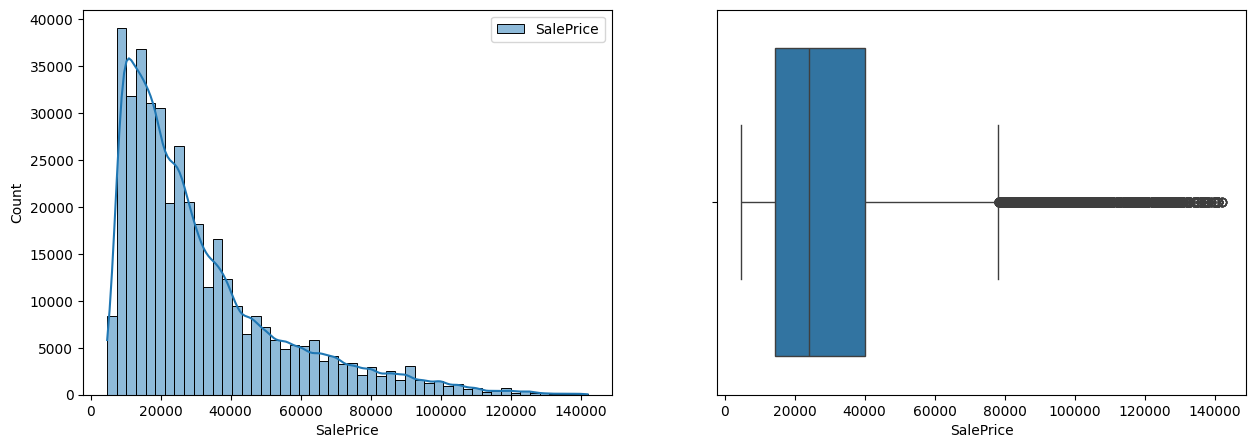

In [8]:
# Lets see SalePrice distribution
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(df.SalePrice, label="SalePrice", bins=50, ax=ax0, kde=True)
ax0.legend()
sns.boxplot(x=df.SalePrice, ax=ax1)
plt.show()

The high positive skewness of the SalePrice distribution suggests that most properties were sold at prices below the mean sale price, as reflected in the corresponding box plot.

Moving forward to look into correlation of the features - this will help us identify impact of certain feaatures on our target variable.

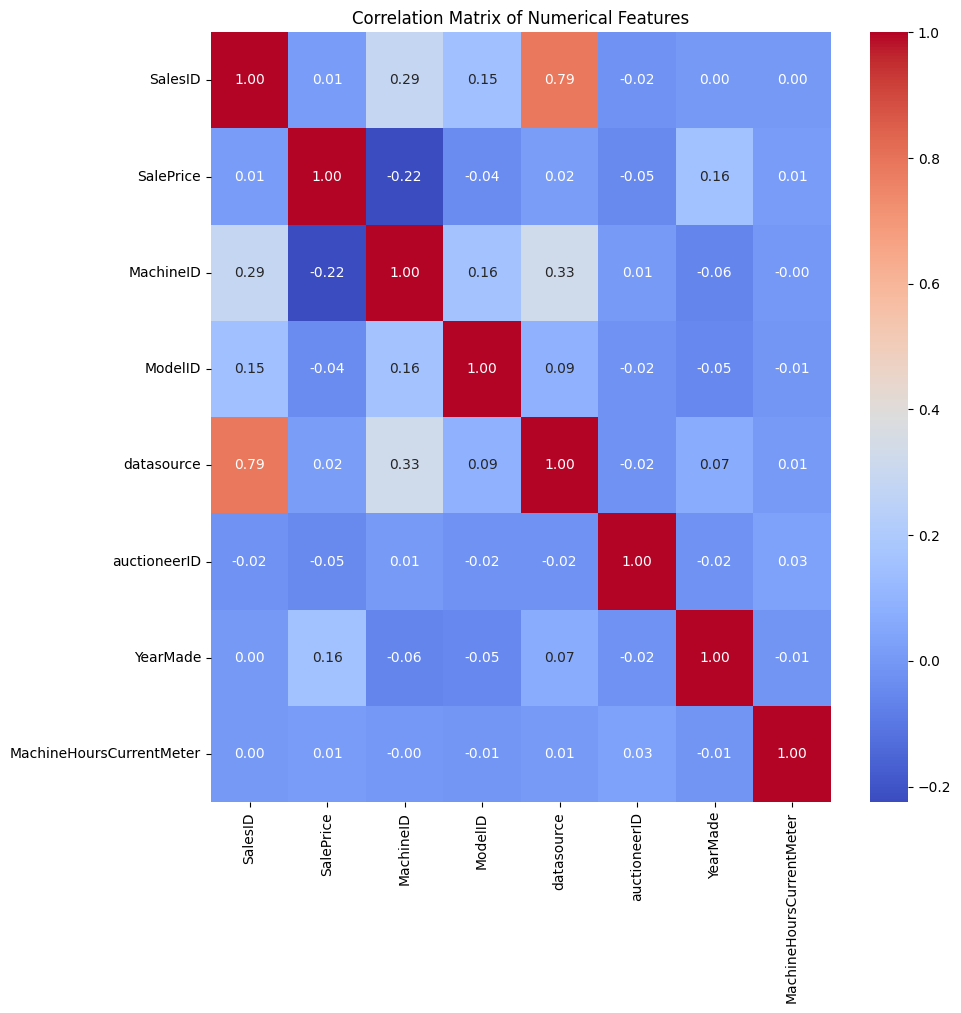

In [9]:
# Ploting feature correlation matrix (only numerical features)
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

We can see that YearMade and MachineId are two features that have highest correlation with SalePrice. They should be investigated further.

YearMade represents the registered manufacturing year of each auctioned machine. Let's examine how sales counts and average sale prices are distributed across different manufacturing years.

/tmp/ipython-input-2733576496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="YearMade",
/tmp/ipython-input-2733576496.py:4: UserWarning: 
The palette list has fewer values (6) than needed (72) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="YearMade",
/tmp/ipython-input-2733576496.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="YearMade",
/tmp/ipython-input-2733576496.py:11: UserWarning: 
The palette list has fewer values (6) than needed (72) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="YearMade",


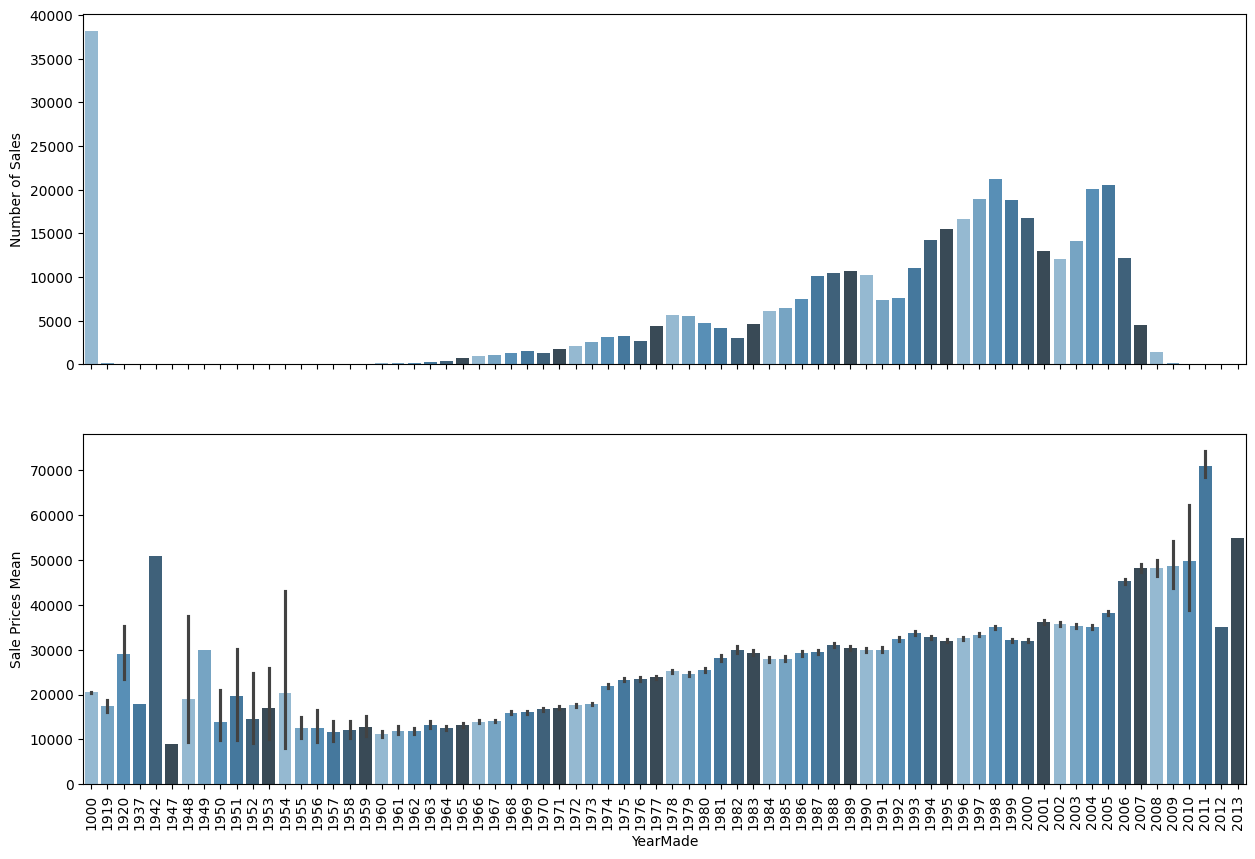

In [10]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 10))

# Plotting the sell count for each year
sns.countplot(x="YearMade",
              data=df,
              palette=sns.color_palette("Blues_d"),
              ax=ax0)
ax0.set_ylabel("Number of Sales")

# Plotting the mean price for each year
sns.barplot(x="YearMade",
            y="SalePrice",
            data=df,
            palette=sns.color_palette("Blues_d"),
            ax=ax1)
ax1.set_ylabel("Sale Prices Mean")

plt.xticks(rotation=90)
plt.show()

The year 1000 shows a high concentration of manufactured machines, which may be due to data collection errors or serve as a placeholder for unregistered years; therefore, it will be left as is. Apart from this, the first plot reveals that most auctioned machines were manufactured around 1998 and 2005, with relatively few machines made after 2008. The distribution of sale prices by manufacturing year follows the expected trend: newer machines generally command higher prices than older ones, with some exceptions.

MachineID
This feature serves as an identifier for each specific machine. Since machines can be sold multiple times, it is expected that some MachineID values will appear in more than one entry. To confirm, we will check for unique MachineID values.

In [11]:
# Print the rate of unique values for MachineID
unique_machine_ids = df['MachineID'].nunique()
total_machine_ids = len(df)
unique_rate = unique_machine_ids / total_machine_ids
print(f"Number of unique MachineIDs: {unique_machine_ids}")
print(f"Rate of unique MachineID values: {unique_rate:.4f}")

Number of unique MachineIDs: 341027
Rate of unique MachineID values: 0.8502


MachineID exhibits high cardinality, making it unlikely that its distribution alone will reveal meaningful patterns. To gain better insights, a scatter plot of SalePrice by MachineID will be created, incorporating the datasource feature—which has significant correlation with MachineID—to enhance the interpretation of the results.

<Axes: xlabel='MachineID', ylabel='SalePrice'>

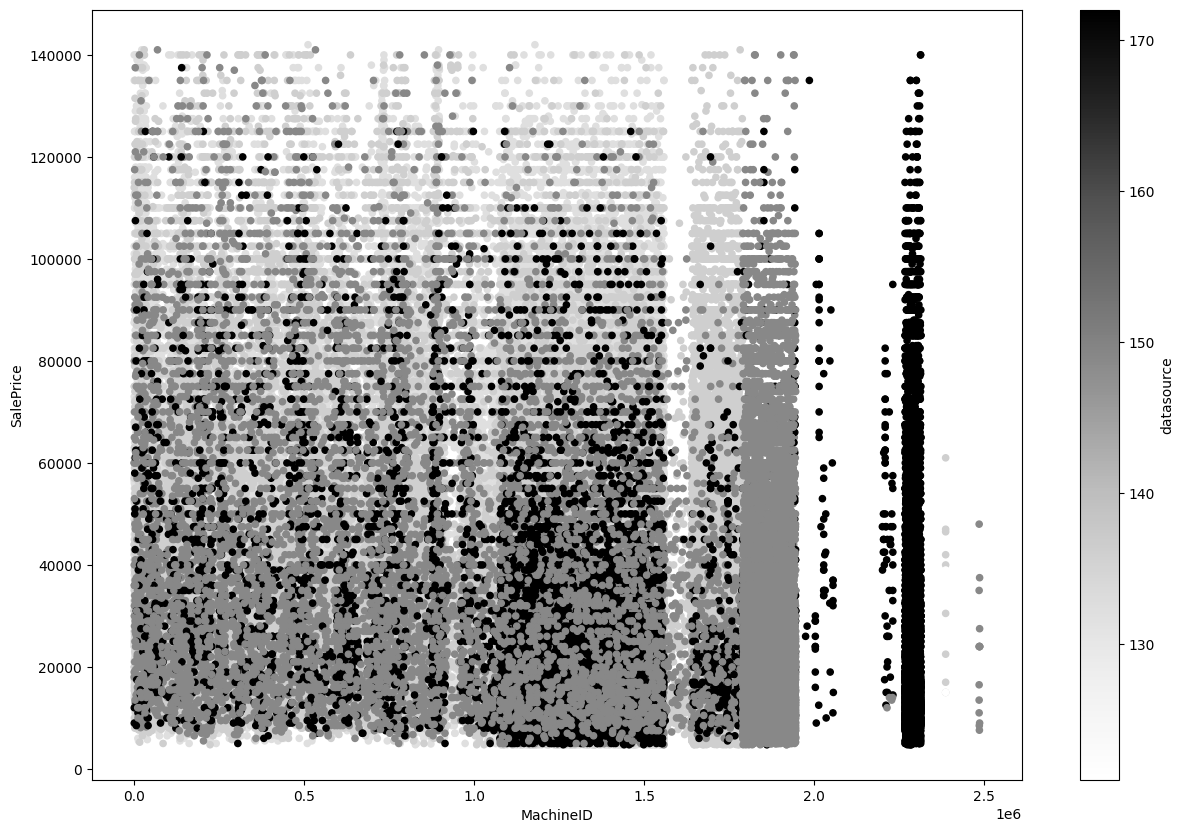

In [12]:
df.plot.scatter(x="MachineID", y="SalePrice", c="datasource", figsize=(15, 10))

Initially, no clear patterns can be inferred from this distribution except that most selling prices cluster in the lower range, reinforcing the earlier observation that many prices fall below the mean. Additionally, certain data sources appear specialized in reporting specific machines.

ANALYZE MISSING VALUES

In [13]:
print("="*80)
print("ANALYZING MISSING VALUES")
print("="*80)

# Display current missing values summary
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
}).sort_values('Null Percentage', ascending=False)

print("\nColumns with Missing Values:")
print(null_info[null_info['Null Count'] > 0])



ANALYZING MISSING VALUES

Columns with Missing Values:
                          Null Count  Null Percentage
Pushblock                     375906        93.712932
Tip_Control                   375906        93.712932
Enclosure_Type                375906        93.712932
Engine_Horsepower             375906        93.712932
Blade_Extension               375906        93.712932
Blade_Width                   375906        93.712932
Scarifier                     375895        93.710190
Grouser_Tracks                357763        89.189903
Hydraulics_Flow               357763        89.189903
Coupler_System                357667        89.165971
fiModelSeries                 344217        85.812901
Steering_Controls             331756        82.706388
Differential_Type             331714        82.695918
UsageBand                     331486        82.639078
fiModelDescriptor             329206        82.070676
Backhoe_Mounting              322453        80.387161
Stick                      

This missing value summary reflects the raw dataset before cleaning.

REMOVE DUPLICATES

In [14]:
# ============================================================================
# CELL 2: REMOVE DUPLICATES
# This removes any duplicate rows from the data
# ============================================================================

print("="*80)
print("REMOVING DUPLICATES")
print("="*80)

# Create a copy to work with
df_processed = df.copy()

# Check and remove duplicates
duplicates_before = df_processed.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates_before}")

if duplicates_before > 0:
    df_processed = df_processed.drop_duplicates()
    duplicates_after = df_processed.duplicated().sum()
    print(f" Duplicates removed: {duplicates_before}")
    print(f" Remaining duplicates: {duplicates_after}")
    print(f" New shape: {df_processed.shape}")
else:
    print(" No duplicate rows found - data is clean!")



REMOVING DUPLICATES

Duplicate rows found: 0
 No duplicate rows found - data is clean!


HANDLE MISSING VALUES

In [15]:
# ============================================================================
# CELL 3: HANDLE MISSING VALUES
# This fixes all the null/missing values in the data
# ============================================================================

print("="*80)
print("HANDLING MISSING VALUES")
print("="*80)

# Strategy 1: Drop columns with >70% missing values
threshold = 70
cols_to_drop = null_info[null_info['Null Percentage'] > threshold].index.tolist()
if cols_to_drop:
    print(f"\nDropping columns with >{threshold}% missing values:")
    print(cols_to_drop)
    df_processed = df_processed.drop(columns=cols_to_drop)
    cols_to_drop_GLOBAL = cols_to_drop.copy()
else:
    print(f"\nNo columns with >{threshold}% missing values found.")

# Strategy 2: Handle numerical columns
print("\n--- Handling Numerical Columns ---")
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'SalePrice']

for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"  {col}: Filled with median = {median_val:.2f}")

# Strategy 3: Handle categorical columns
print("\n--- Handling Categorical Columns ---")
categorical_cols = df_processed.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna('Unknown', inplace=True)
        print(f"  {col}: Filled with 'Unknown'")

# Strategy 4: Handle YearMade = 1000
print("\n--- Handling YearMade = 1000 ---")
if 'YearMade' in df_processed.columns:
    year_1000_count = (df_processed['YearMade'] == 1000).sum()
    print(f"Records with YearMade = 1000: {year_1000_count}")

    valid_years = df_processed[df_processed['YearMade'] != 1000]['YearMade']
    median_year = valid_years.median()
    df_processed.loc[df_processed['YearMade'] == 1000, 'YearMade'] = median_year
    print(f"Replaced with median year: {median_year:.0f}")

# Verify
print("\n--- Verification ---")
remaining_nulls = df_processed.isnull().sum().sum()
print(f"Total remaining null values: {remaining_nulls}")

print("\n Missing values handled!.")




HANDLING MISSING VALUES

Dropping columns with >70% missing values:
['Pushblock', 'Tip_Control', 'Enclosure_Type', 'Engine_Horsepower', 'Blade_Extension', 'Blade_Width', 'Scarifier', 'Grouser_Tracks', 'Hydraulics_Flow', 'Coupler_System', 'fiModelSeries', 'Steering_Controls', 'Differential_Type', 'UsageBand', 'fiModelDescriptor', 'Backhoe_Mounting', 'Stick', 'Pad_Type', 'Turbocharged', 'Blade_Type', 'Travel_Controls', 'Tire_Size', 'Grouser_Type', 'Track_Type', 'Stick_Length', 'Pattern_Changer', 'Thumb', 'Undercarriage_Pad_Width', 'Ripper', 'Drive_System']

--- Handling Numerical Columns ---
  auctioneerID: Filled with median = 2.00
  MachineHoursCurrentMeter: Filled with median = 0.00

--- Handling Categorical Columns ---
  fiSecondaryDesc: Filled with 'Unknown'


/tmp/ipython-input-4284497092.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(median_val, inplace=True)
/tmp/ipython-input-4284497092.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

  ProductSize: Filled with 'Unknown'
  Enclosure: Filled with 'Unknown'
  Forks: Filled with 'Unknown'
  Ride_Control: Filled with 'Unknown'
  Transmission: Filled with 'Unknown'
  Hydraulics: Filled with 'Unknown'
  Coupler: Filled with 'Unknown'

--- Handling YearMade = 1000 ---
Records with YearMade = 1000: 38185
Replaced with median year: 1996

--- Verification ---
Total remaining null values: 0

 Missing values handled!.



1. Dropped columns with >70% missing data — because such columns contribute minimal usable information.  
2. Filled numeric columns with median values — median is robust against outliers and preserves central tendency.  
3. Filled categorical columns with 'Unknown' — prevents data loss while retaining categorical integrity.  
4. Replaced YearMade = 1000 with median valid year — corrects placeholder data to a realistic manufacturing year.



ADD EXTRA COLUMNS

In [16]:
print("="*80)
print("ADDING EXTRA COLUMNS")
print("="*80)

# Column 1: MachineAge
if 'YearMade' in df_processed.columns:
    current_year = 2012
    df_processed['MachineAge'] = current_year - df_processed['YearMade']
    print(f" Added 'MachineAge' column")
    print(f"  Range: {df_processed['MachineAge'].min()} to {df_processed['MachineAge'].max()} years")

# Column 2: Sale Year
if 'saledate' in df_processed.columns:
    df_processed['SaleYear'] = df_processed['saledate'].dt.year
    print(f" Added 'SaleYear' column")

# Column 3: Sale Month
if 'saledate' in df_processed.columns:
    df_processed['SaleMonth'] = df_processed['saledate'].dt.month
    print(f" Added 'SaleMonth' column")

# Column 4: Sale Day of Week
if 'saledate' in df_processed.columns:
    df_processed['SaleDayOfWeek'] = df_processed['saledate'].dt.dayofweek
    print(f" Added 'SaleDayOfWeek' column (0=Monday, 6=Sunday)")

# Column 5: Sale Quarter
if 'saledate' in df_processed.columns:
    df_processed['SaleQuarter'] = df_processed['saledate'].dt.quarter
    print(f" Added 'SaleQuarter' column")

# Column 6: Machine Resale Count
if 'MachineID' in df_processed.columns:
    machine_resale_counts = df_processed['MachineID'].value_counts()
    df_processed['MachineResaleCount'] = df_processed['MachineID'].map(machine_resale_counts)
    print(f" Added 'MachineResaleCount' column")

# Column 7: Price per Age
if 'SalePrice' in df_processed.columns and 'MachineAge' in df_processed.columns:
    df_processed['PricePerAge'] = df_processed['SalePrice'] / (df_processed['MachineAge'] + 1)
    print(f" Added 'PricePerAge' column")

# Column 8: Is Very Old flag
if 'MachineAge' in df_processed.columns:
    df_processed['IsVeryOld'] = (df_processed['MachineAge'] > 30).astype(int)
    print(f" Added 'IsVeryOld' flag")
    print(f"  Very old machines: {df_processed['IsVeryOld'].sum()}")

print(f"\n Total new columns added: 8")

ADDING EXTRA COLUMNS
 Added 'MachineAge' column
  Range: -1 to 93 years
 Added 'SaleYear' column
 Added 'SaleMonth' column
 Added 'SaleDayOfWeek' column (0=Monday, 6=Sunday)
 Added 'SaleQuarter' column
 Added 'MachineResaleCount' column
 Added 'PricePerAge' column
 Added 'IsVeryOld' flag
  Very old machines: 47746

 Total new columns added: 8


Created 8 new derived columns to improve interpretability and modeling power:
- MachineAge — captures age as a key predictor.  
- SaleYear, SaleMonth, SaleDayOfWeek, SaleQuarter — add temporal granularity.  
- MachineResaleCount — measures how often machines are resold.  
- PricePerAge — normalizes sale price by age.  
- IsVeryOld — flags machines older than 30 years.

SUMMARY AND VISUALIZATIONS



SUMMARY

Original shape: (401125, 53)
Processed shape: (401125, 31)
Columns dropped: 30

--- New Columns Created ---
1. MachineAge
2. SaleYear
3. SaleMonth
4. SaleDayOfWeek
5. SaleQuarter
6. MachineResaleCount
7. PricePerAge
8. IsVeryOld

--- Data Quality Check ---
Total null values: 0
Duplicate rows: 0

--- Sample of Processed Data ---


,MachineAge,SaleYear,SaleMonth,MachineResaleCount,SalePrice
0,8,2006,11,1,66000
1,16,2004,3,1,57000
2,11,2004,2,3,10000
3,11,2011,5,1,38500
4,5,2009,7,1,11000


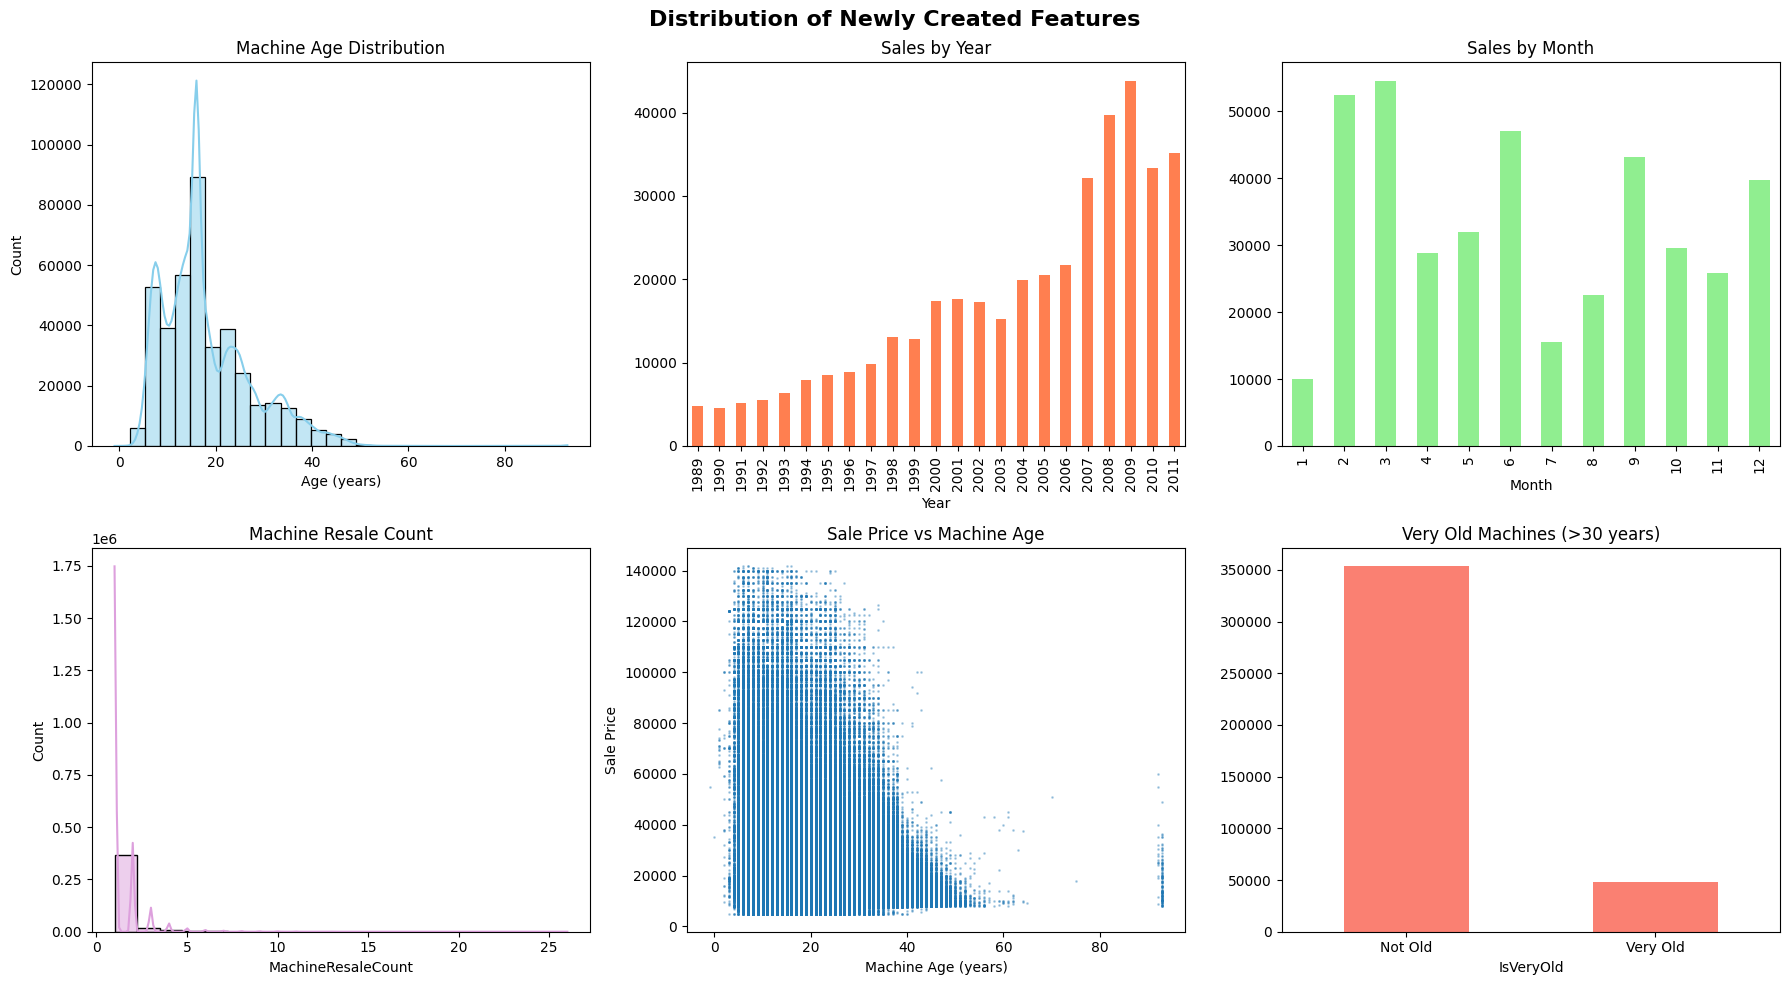

In [17]:
print("="*80)
print("SUMMARY")
print("="*80)

print(f"\nOriginal shape: {df.shape}")
print(f"Processed shape: {df_processed.shape}")
print(f"Columns dropped: {len(cols_to_drop)}")

print("\n--- New Columns Created ---")
new_columns = ['MachineAge', 'SaleYear', 'SaleMonth', 'SaleDayOfWeek',
               'SaleQuarter', 'MachineResaleCount', 'PricePerAge', 'IsVeryOld']
for i, col in enumerate(new_columns, 1):
    if col in df_processed.columns:
        print(f"{i}. {col}")

print("\n--- Data Quality Check ---")
print(f"Total null values: {df_processed.isnull().sum().sum()}")
print(f"Duplicate rows: {df_processed.duplicated().sum()}")

# Display sample
print("\n--- Sample of Processed Data ---")
display(df_processed[['MachineAge', 'SaleYear', 'SaleMonth', 'MachineResaleCount', 'SalePrice']].head())

# Create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Newly Created Features', fontsize=16, fontweight='bold')

# Plot 1: MachineAge
if 'MachineAge' in df_processed.columns:
    sns.histplot(df_processed['MachineAge'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Machine Age Distribution')
    axes[0, 0].set_xlabel('Age (years)')

# Plot 2: SaleYear
if 'SaleYear' in df_processed.columns:
    df_processed['SaleYear'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1], color='coral')
    axes[0, 1].set_title('Sales by Year')
    axes[0, 1].set_xlabel('Year')

# Plot 3: SaleMonth
if 'SaleMonth' in df_processed.columns:
    df_processed['SaleMonth'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 2], color='lightgreen')
    axes[0, 2].set_title('Sales by Month')
    axes[0, 2].set_xlabel('Month')

# Plot 4: MachineResaleCount
if 'MachineResaleCount' in df_processed.columns:
    sns.histplot(df_processed['MachineResaleCount'], bins=20, kde=True, ax=axes[1, 0], color='plum')
    axes[1, 0].set_title('Machine Resale Count')

# Plot 5: SalePrice vs MachineAge
if 'MachineAge' in df_processed.columns and 'SalePrice' in df_processed.columns:
    axes[1, 1].scatter(df_processed['MachineAge'], df_processed['SalePrice'], alpha=0.3, s=1)
    axes[1, 1].set_title('Sale Price vs Machine Age')
    axes[1, 1].set_xlabel('Machine Age (years)')
    axes[1, 1].set_ylabel('Sale Price')

# Plot 6: IsVeryOld
if 'IsVeryOld' in df_processed.columns:
    df_processed['IsVeryOld'].value_counts().plot(kind='bar', ax=axes[1, 2], color='salmon')
    axes[1, 2].set_title('Very Old Machines (>30 years)')
    axes[1, 2].set_xticklabels(['Not Old', 'Very Old'], rotation=0)

plt.tight_layout()
plt.show()



1. MachineAge Distribution
   Most machines are between 5–20 years old, showing the auction market mainly handles mid-aged equipment.

2. Sales by Year  
   Sales peak between 2006–2009, reflecting a period of high auction activity or strong market demand.

3. Sales by Month  
   Monthly distribution is fairly uniform, suggesting no strong seasonal bias in sales volume.

4. Machine Resale Count  
   Most machines were sold only once, though a few were resold multiple times—useful for identifying frequently traded assets.

5. SalePrice vs MachineAge  
   A clear negative relationship—older machines generally sell for lower prices.  
   This confirms age is a key depreciation factor.

6. IsVeryOld Flag  
   Most machines are not very old, and very old units (>30 years) form a small minority, often corresponding to lower prices.


Handle Leaky & Redundant Columns

In [18]:
print(f"Original shape: {df_processed.shape}")

df_processed.info()

# 1. Drop 'PricePerAge': This is DATA LEAKAGE.
#    It was calculated using 'SalePrice', our target variable.
#    A model would "cheat" by using it, leading to a useless, perfect score.
if 'PricePerAge' in df_processed.columns:
    df_processed = df_processed.drop(columns=['PricePerAge'])
    print("Dropped leaky 'PricePerAge' column.")

# 2. Drop 'saledate': This is a REDUNDANT column.
#    We already extracted all the useful information from it
#    (SaleYear, SaleMonth, SaleDayOfWeek, etc.).
if 'saledate' in df_processed.columns:
    df_processed = df_processed.drop(columns=['saledate'])
    print("Dropped redundant 'saledate' column.")

print(f"New shape: {df_processed.shape}")

Original shape: (401125, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              401125 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  401125 non-null  float64       
 8   saledate                  401125 non-null  datetime64[ns]
 9   fiModelDesc               401125 non-null  object        
 10  fiBaseModel               401125 non-null  object        
 11  fiSecondaryDesc           401125 non

Log-Transform the Target Variable (SalePrice)

As the earlier histogram showed, SalePrice is "right-skewed" (it has a long tail of very expensive items). Machine learning models work better with normally distributed data.

More importantly, the competition is judged on RMSLE (Root Mean Squared Logarithmic Error). By taking the log of SalePrice now, we can train our model using a standard RMSE (Root Mean Squared Error), and the result will be equivalent to the competition metric.

Created 'SalePrice_log' and dropped original 'SalePrice'.


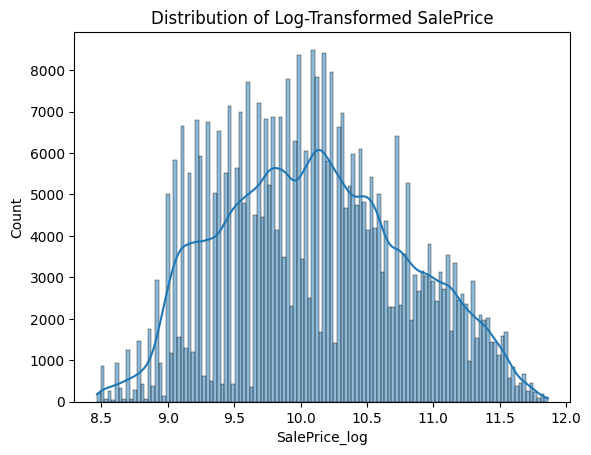

In [19]:
import numpy as np
# Apply log transform to SalePrice
df_processed['SalePrice_log'] = np.log(df_processed['SalePrice'])

# Drop the original SalePrice column
df_processed = df_processed.drop(columns=['SalePrice'])

print("Created 'SalePrice_log' and dropped original 'SalePrice'.")



sns.histplot(df_processed['SalePrice_log'], kde=True)
plt.title('Distribution of Log-Transformed SalePrice')
plt.show()

Convert Categorical Columns to Codes

Our dataset still has many object (text) columns (e.g., UsageBand, ProductGroup). Machine learning models only understand numbers.

We can't use One-Hot Encoding because some columns have thousands of unique values (this would create thousands of new columns).

Instead, we will use Categorical Encoding. We'll convert each string to a unique integer code. Pandas has a built-in .astype('category') and .cat.codes function that is perfect and efficient for this.

In [20]:
print("="*80)
print("CONVERTING CATEGORICALS TO CODES (AND SAVING MAPS)")
print("="*80)

df_processed.info()

# Find all 'object' type columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns
print(f"Found {len(categorical_cols)} categorical columns to convert:")

# Create a dictionary to store all the category mappings
category_maps = {}

for col in categorical_cols:
    print(f"  - Converting '{col}'...")
    # 1. Convert the column to pandas 'category' dtype
    df_processed[col] = df_processed[col].astype('category')

    # 2. SAVE THE MAPPING
    #    We store the "dictionary" of categories for this column
    category_maps[col] = df_processed[col].cat.categories

    # 3. Replace the string values with their integer codes
    df_processed[col] = df_processed[col].cat.codes

print("\nConversion complete.")
print("Category maps have been saved.")

print("\n--- Sample of Processed Data (first 5 rows) ---")
display(df_processed.head())

print("\n--- Data Types After Conversion ---")
df_processed.info()

CONVERTING CATEGORICALS TO CODES (AND SAVING MAPS)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   MachineID                 401125 non-null  int64  
 2   ModelID                   401125 non-null  int64  
 3   datasource                401125 non-null  int64  
 4   auctioneerID              401125 non-null  float64
 5   YearMade                  401125 non-null  int64  
 6   MachineHoursCurrentMeter  401125 non-null  float64
 7   fiModelDesc               401125 non-null  object 
 8   fiBaseModel               401125 non-null  object 
 9   fiSecondaryDesc           401125 non-null  object 
 10  ProductSize               401125 non-null  object 
 11  fiProductClassDesc        401125 non-null  object 
 12  state                     401125 non-null  object

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Hydraulics,Coupler,MachineAge,SaleYear,SaleMonth,SaleDayOfWeek,SaleQuarter,MachineResaleCount,IsVeryOld,SalePrice_log
0,1139246,999089,3157,121,3.0,2004,68.0,949,295,40,...,0,2,8,2006,11,3,4,1,0,11.097410
1,1139248,117657,77,121,3.0,1996,4640.0,1724,526,54,...,0,2,16,2004,3,4,1,1,0,10.950807
2,1139249,434808,7009,121,3.0,2001,2838.0,330,109,157,...,3,2,11,2004,2,3,1,3,0,9.210340
3,1139251,1026470,332,121,3.0,2001,3486.0,3673,1374,157,...,0,2,11,2011,5,3,2,1,0,10.558414
4,1139253,1057373,17311,121,3.0,2007,722.0,4207,1528,157,...,3,2,5,2009,7,3,3,1,0,9.305651



--- Data Types After Conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   MachineID                 401125 non-null  int64  
 2   ModelID                   401125 non-null  int64  
 3   datasource                401125 non-null  int64  
 4   auctioneerID              401125 non-null  float64
 5   YearMade                  401125 non-null  int64  
 6   MachineHoursCurrentMeter  401125 non-null  float64
 7   fiModelDesc               401125 non-null  int16  
 8   fiBaseModel               401125 non-null  int16  
 9   fiSecondaryDesc           401125 non-null  int16  
 10  ProductSize               401125 non-null  int8   
 11  fiProductClassDesc        401125 non-null  int8   
 12  state                     401125 non-null  int8   
 13  Product

Processing the Validation Data (Valid.csv)

This is a critical step. To get a fair comparison, we must apply the exact same processing steps to Valid.csv as we did to Train.csv.

This means:

We must fill missing numerical values in Valid.csv using the medians from Train.csv.

We must handle YearMade == 1000 using the median year from Train.csv.

We must convert categorical strings to codes.


In [21]:

df_val = pd.read_csv("/content/Valid.csv",
                     low_memory=False,
                     parse_dates=["saledate"])

#============================================================================
# 1. DROP HIGH-NULL COLUMNS (to match training set)
# ============================================================================
if 'cols_to_drop_GLOBAL' in locals() and cols_to_drop_GLOBAL:
    print(f"\nDropping {len(cols_to_drop_GLOBAL)} columns to match training set...")
    # 'errors='ignore'' handles any columns that might be missing
    df_val = df_val.drop(columns=cols_to_drop_GLOBAL, errors='ignore')
else:
    print("Warning: 'cols_to_drop_GLOBAL' not found. Skipping column drop.")

# ============================================================================
# 2. HANDLE MISSING VALUES (using TRAIN data stats from 'df')
# ============================================================================
print("\n--- Handling Missing Values ---")
numerical_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'SalePrice']
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns] # Keep all object names

for col in numerical_cols:
    if col in df_val.columns and df_val[col].isnull().sum() > 0:
        median_val = df[col].median()
        df_val[col] = df_val[col].fillna(median_val)
print("  Filled missing numerical features.")

for col in categorical_cols:
     if col in df_val.columns and df_val[col].isnull().sum() > 0:
        df_val[col] = df_val[col].fillna('Unknown')
print("  Filled missing categorical features.")

# ============================================================================
# 3. HANDLE 'YearMade == 1000' (using TRAIN data stats from 'df')
# ============================================================================
print("\n--- Handling YearMade = 1000 ---")
if 'YearMade' in df_val.columns:
    valid_years = df[df['YearMade'] != 1000]['YearMade']
    median_year = valid_years.median()
    df_val.loc[df_val['YearMade'] == 1000, 'YearMade'] = median_year
print(f"  Replaced with median year: {median_year:.0f}")

# ============================================================================
# 4. ADD *ALL* NEW FEATURES (to match df_processed)
# ============================================================================
print("\n--- Adding New Features (to match train set) ---")
current_year = 2012
# Column 1: MachineAge
df_val['MachineAge'] = current_year - df_val['YearMade']
# Column 2: SaleYear
df_val['SaleYear'] = df_val['saledate'].dt.year
# Column 3: SaleMonth
df_val['SaleMonth'] = df_val['saledate'].dt.month
# Column 4: SaleDayOfWeek
df_val['SaleDayOfWeek'] = df_val['saledate'].dt.dayofweek
# Column 5: SaleQuarter
df_val['SaleQuarter'] = df_val['saledate'].dt.quarter
# Column 6: MachineResaleCount
# We must use the map from the *training* data ('df_processed')
if 'MachineResaleCount' in df_processed.columns:
    # Create a map of MachineID -> ResaleCount from the training data
    machine_resale_map = df_processed.set_index('MachineID')['MachineResaleCount'].to_dict()
    df_val['MachineResaleCount'] = df_val['MachineID'].map(machine_resale_map)
    # Fill any new MachineIDs (not in train set) with a count of 1 (first sale)
    df_val['MachineResaleCount'] = df_val['MachineResaleCount'].fillna(1)
else:
     print("  Warning: 'MachineResaleCount' not in df_processed. Skipping.")
# Column 7: PricePerAge (Cannot be created yet, SalePrice not merged)
# Column 8: IsVeryOld
df_val['IsVeryOld'] = (df_val['MachineAge'] > 30).astype(int)
print("  Added all new date/age/flag features.")
print("\n--- Feature processing complete. ---")


Dropping 30 columns to match training set...

--- Handling Missing Values ---
  Filled missing numerical features.
  Filled missing categorical features.

--- Handling YearMade = 1000 ---
  Replaced with median year: 1996

--- Adding New Features (to match train set) ---
  Added all new date/age/flag features.

--- Feature processing complete. ---


Load and Merge ValidSolution.csv (Target)

Now that our features (df_val) are processed, we need to load the "answers." The ValidSolution.csv file contains the SalesID and the corresponding SalePrice. We will merge this into df_val and then create our log-transformed target variable, SalePrice_log.

In [22]:


try:
    df_val_solution = pd.read_csv("/content/ValidSolution.csv")

    # --- B. Sort both DataFrames by 'SalesID' to ensure correct alignment ---
    df_val = df_val.sort_values(by='SalesID')
    df_val_solution = df_val_solution.sort_values(by='SalesID')

    # --- C. Add 'SalePrice' from solutions to 'df_val' ---
    # We use .values to assign the column directly, assuming the row counts match
    df_val['SalePrice'] = df_val_solution['SalePrice'].values

    print("  Successfully merged 'SalePrice' from 'ValidSolution.csv'.")

    # --- D. Log-Transform the Target Variable ---
    df_val['SalePrice_log'] = np.log(df_val['SalePrice'])
    print("  Successfully created 'SalePrice_log'.")

    # --- E. Final check ---
    print("\n--- Sample of merged target data ---")
    display(df_val[['SalesID', 'SalePrice', 'SalePrice_log']].head())

except FileNotFoundError:
    print("Error: 'ValidSolution.csv' not found. Please update the file path.")
except ValueError:
    print("Error: Row count mismatch between Valid.csv and ValidSolution.csv.")

df_val.info()

  Successfully merged 'SalePrice' from 'ValidSolution.csv'.
  Successfully created 'SalePrice_log'.

--- Sample of merged target data ---


,SalesID,SalePrice,SalePrice_log
0,1222837,31000.0,10.341742
1,1222839,54000.0,10.896739
2,1222841,26500.0,10.184900
3,1222843,10000.0,9.210340
4,1222845,35000.0,10.463103


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   11573 non-null  int64         
 1   MachineID                 11573 non-null  int64         
 2   ModelID                   11573 non-null  int64         
 3   datasource                11573 non-null  int64         
 4   auctioneerID              11573 non-null  int64         
 5   YearMade                  11573 non-null  int64         
 6   MachineHoursCurrentMeter  11573 non-null  float64       
 7   saledate                  11573 non-null  datetime64[ns]
 8   fiModelDesc               11573 non-null  object        
 9   fiBaseModel               11573 non-null  object        
 10  fiSecondaryDesc           11573 non-null  object        
 11  ProductSize               11573 non-null  object        
 12  fiProductClassDesc

Encode Categorical Features

This is the final step. We must convert all categorical string columns (like UsageBand, ProductGroup, etc.) into numbers. To ensure consistency, we will use the exact same categories and codes that were learned from the df_processed (training) set.

In [23]:
print("--- Encoding Validation Data (df_val) using saved maps ---")

# 'categorical_cols' was defined in the cell that processed df_val
# 'category_maps' was created in the cell that encoded df_processed

for col in categorical_cols:
    if col in df_val.columns:
        # 1. Convert the validation column to 'category'
        df_val[col] = df_val[col].astype('category')

        if col in category_maps:
            # 2. Apply the *saved* categories from the training set
            df_val[col] = df_val[col].cat.set_categories(category_maps[col])

            # 3. Convert to codes. Any new/unseen categories will become -1
            df_val[col] = df_val[col].cat.codes

            # 4. Fill any -1 (unseen) codes with 0 (which corresponds to 'Unknown')
            df_val[col] = df_val[col].replace(-1, 0)
        else:
            # This shouldn't happen, but as a fallback:
            print(f"  Warning: No category map for '{col}'. Encoding as is.")
            df_val[col] = df_val[col].cat.codes

print("\n--- Final df_val.info() after encoding ---")
# All columns should now be numeric (except saledate)
df_val.info()
print("\nValidation.csv processing complete.")

--- Encoding Validation Data (df_val) using saved maps ---

--- Final df_val.info() after encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   11573 non-null  int64         
 1   MachineID                 11573 non-null  int64         
 2   ModelID                   11573 non-null  int64         
 3   datasource                11573 non-null  int64         
 4   auctioneerID              11573 non-null  int64         
 5   YearMade                  11573 non-null  int64         
 6   MachineHoursCurrentMeter  11573 non-null  float64       
 7   saledate                  11573 non-null  datetime64[ns]
 8   fiModelDesc               11573 non-null  int16         
 9   fiBaseModel               11573 non-null  int16         
 10  fiSecondaryDesc           11573 non-nul



Create Final X/y Variables & Scaled Versions

This is the final step in our data pipeline. We will now formally separate our features (X) from our target (y) for both the training and validation sets.

Crucially, since both of your assigned models (Ridge and KNN) are sensitive to the scale of features, we will also create scaled versions of our data:

X_train_scaled

X_val_scaled

We will use StandardScaler, fitting it only on X_train and then using that same fitted scaler to transform both X_train and X_val. This prevents any data leakage from the validation set into our training process.

In [24]:
from sklearn.preprocessing import StandardScaler


TARGET_NAME = 'SalePrice_log'
# 'PricePerAge' was built using SalePrice, so it's a "leaky" feature and must be dropped.
leaky_cols = ['PricePerAge']

# Create X_train, y_train from 'df_processed'
y_train = df_processed[TARGET_NAME]
cols_to_drop_train = [TARGET_NAME, 'SalePrice', 'saledate'] + leaky_cols
X_train = df_processed.drop(columns=cols_to_drop_train, errors='ignore')

# Create X_val, y_val from 'df_val'
y_val = df_val[TARGET_NAME]

# Align columns: Ensure X_val has the same columns in the same order as X_train
X_val = df_val[X_train.columns]

print(f"X_train shape: {X_train.shape} | X_val shape: {X_val.shape}")

# ============================================================================
# CREATE SCALED DATA for Ridge and KNN [cite: 116]
# ============================================================================
print("\n--- Scaling data for distance-based models ---")
scaler = StandardScaler()
# Fit on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# ONLY transform the validation data (using the scaler fit to the train data)
X_val_scaled = scaler.transform(X_val)
print("Data successfully scaled.")

X_train shape: (401125, 28) | X_val shape: (11573, 28)

--- Scaling data for distance-based models ---
Data successfully scaled.


In [25]:
print("="*80)
print("PROCESSING TEST DATA (Test.csv)")
print("="*80)

# 1. Load the test data
df_test = pd.read_csv("/content/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

print(f"\nOriginal test data shape: {df_test.shape}")

# 2. Drop high-null columns (to match training set)
if 'cols_to_drop_GLOBAL' in locals() and cols_to_drop_GLOBAL:
    print(f"\nDropping {len(cols_to_drop_GLOBAL)} columns to match training set...")
    df_test = df_test.drop(columns=cols_to_drop_GLOBAL, errors='ignore')
else:
    print("Warning: 'cols_to_drop_GLOBAL' not found. Skipping column drop.")

# 3. Handle missing numerical values (using TRAIN data stats from 'df')
print("\n--- Handling Missing Numerical Values ---")
# Get numerical columns from the original training dataframe 'df'
numerical_cols_train = df.select_dtypes(include=np.number).columns.tolist()
# Remove 'SalePrice' as it's not in the test set
if 'SalePrice' in numerical_cols_train:
    numerical_cols_train.remove('SalePrice')

for col in numerical_cols_train:
    if col in df_test.columns and df_test[col].isnull().sum() > 0:
        # Use median from the original training data 'df'
        median_val = df[col].median()
        df_test[col] = df_test[col].fillna(median_val)
        # print(f"  {col}: Filled with median from train data = {median_val:.2f}") # Optional print

print("  Filled missing numerical features using training data medians.")

# 4. Handle missing categorical values (using TRAIN data stats from 'df')
print("\n--- Handling Missing Categorical Values ---")
# Get categorical columns from the original training dataframe 'df'
categorical_cols_train = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols_train:
     if col in df_test.columns and df_test[col].isnull().sum() > 0:
        df_test[col] = df_test[col].fillna('Unknown')
        # print(f"  {col}: Filled with 'Unknown'") # Optional print
print("  Filled missing categorical features with 'Unknown'.")


# 5. Handle 'YearMade == 1000' (using TRAIN data stats from 'df')
print("\n--- Handling YearMade = 1000 ---")
if 'YearMade' in df_test.columns:
    # Use median year from valid years in the original training data 'df'
    valid_years_train = df[df['YearMade'] != 1000]['YearMade']
    median_year_train = valid_years_train.median()
    year_1000_count_test = (df_test['YearMade'] == 1000).sum()
    if year_1000_count_test > 0:
        df_test.loc[df_test['YearMade'] == 1000, 'YearMade'] = median_year_train
        print(f"  Records with YearMade = 1000 in test data: {year_1000_count_test}. Replaced with median year from train: {median_year_train:.0f}")
    else:
        print("  No records with YearMade = 1000 found in test data.")
else:
    print("  'YearMade' column not found in test data.")


# 6. Add ALL new features (to match df_processed)
print("\n--- Adding New Features (to match train set) ---")
current_year = 2012 # Assuming the prediction is for sales up to 2012
if 'YearMade' in df_test.columns:
    df_test['MachineAge'] = current_year - df_test['YearMade']
    print("  Added 'MachineAge'.")
if 'saledate' in df_test.columns:
    df_test['SaleYear'] = df_test['saledate'].dt.year
    df_test['SaleMonth'] = df_test['saledate'].dt.month
    df_test['SaleDayOfWeek'] = df_test['saledate'].dt.dayofweek
    df_test['SaleQuarter'] = df_test['saledate'].dt.quarter
    print("  Added date features (SaleYear, SaleMonth, SaleDayOfWeek, SaleQuarter).")
if 'MachineID' in df_test.columns and 'machine_resale_map' in locals():
    df_test['MachineResaleCount'] = df_test['MachineID'].map(machine_resale_map)
    df_test['MachineResaleCount'] = df_test['MachineResaleCount'].fillna(1) # Fill new MachineIDs with 1
    print("  Added 'MachineResaleCount' using train map.")
else:
     print("  Warning: 'MachineID' or 'machine_resale_map' not found. Skipping 'MachineResaleCount'.")
if 'MachineAge' in df_test.columns:
    # Note: PricePerAge is leaky and should NOT be added for prediction
    df_test['IsVeryOld'] = (df_test['MachineAge'] > 30).astype(int)
    print("  Added 'IsVeryOld' flag.")

# Drop the original 'saledate' column from test set
if 'saledate' in df_test.columns:
    df_test = df_test.drop(columns=['saledate'])
    print("  Dropped redundant 'saledate' column.")

print("\n--- Data Quality Check after initial processing ---")
print(f"Total remaining null values: {df_test.isnull().sum().sum()}")


# 7. Encode Categorical Features using saved maps
print("\n--- Encoding Categorical Features using saved maps ---")
# 'categorical_cols_train' contains the names of object columns from original train
# 'category_maps' contains the mappings learned from processed train
for col in categorical_cols_train:
    if col in df_test.columns:
        if col in category_maps:
            df_test[col] = df_test[col].astype('category').cat.set_categories(category_maps[col]).cat.codes
            # Fill any new/unseen categories (-1) with 0 (which is 'Unknown')
            df_test[col] = df_test[col].replace(-1, 0)
            # print(f"  Encoded '{col}' using train map.") # Optional print
        else:
            print(f"  Warning: No category map for '{col}'. Encoding as is.")
            df_test[col] = df_test[col].astype('category').cat.codes
    # else:
        # print(f"  Column '{col}' not found in test set (likely dropped).") # Optional print

print("  Categorical encoding complete.")

print("\n--- Final Data Quality Check ---")
# Check for NaNs again after all processing
nan_in_df_test = df_test.isnull().sum().sum()
if nan_in_df_test > 0:
    print(f"WARNING: Found {nan_in_df_test} NaN values remaining in df_test.")
    # Optional: Print columns with NaNs if any remain
    # print(df_test.isnull().sum()[df_test.isnull().sum() > 0])
    # Fill any remaining NaNs as a failsafe (shouldn't be necessary if logic is correct)
    numerical_cols_test = df_test.select_dtypes(include=np.number).columns
    for col in numerical_cols_test:
        if df_test[col].isnull().sum() > 0:
             # Use median from X_train as the final fallback
            if col in X_train.columns:
                median_val_train = X_train[col].median()
            else: # If column was in original df but not X_train (e.g. SalesID was dropped), use test median as absolute last resort
                median_val_train = df_test[col].median()
            df_test[col] = df_test[col].fillna(median_val_train)
            # print(f"  Filled remaining NaNs in {col} with median {median_val_train:.2f}.") # Optional print
    print(f"Remaining NaNs in df_test after final fill: {df_test.isnull().sum().sum()}")

else:
    print("No NaN values found in df_test.")

# 8. Ensure columns are in the same order as X_train
print("\n--- Aligning columns with X_train ---")
# Keep only columns that are in X_train and ensure the order matches
test_cols_aligned = [col for col in X_train.columns if col in df_test.columns]
df_test_processed = df_test[test_cols_aligned]

# Check for columns present in X_train but not in df_test_processed
missing_in_test = set(X_train.columns) - set(df_test_processed.columns)
if missing_in_test:
    print(f"WARNING: Columns in X_train but not in df_test_processed: {missing_in_test}")
    # Add missing columns to df_test_processed and fill with a default value (e.g., 0 or median from X_train)
    # Using median from X_train is safer for numerical columns
    for col in missing_in_test:
        print(f"  Adding missing column '{col}' to test set and filling with median from X_train.")
        if col in X_train.columns and pd.api.types.is_numeric_dtype(X_train[col]):
             median_val_train = X_train[col].median()
             df_test_processed[col] = median_val_train
        else: # Fallback for non-numeric or columns not in X_train (though X_train.columns check should prevent the latter)
             df_test_processed[col] = 0 # Or some other appropriate default

# Re-order the columns to match X_train exactly
df_test_processed = df_test_processed[X_train.columns]

print(f"Final processed test data shape: {df_test_processed.shape}")
print("Test data preprocessing complete.")

# 9. Standardize the test data using the scaler fitted on training data
print("\n--- Scaling test data ---")
if 'scaler' in locals():
    X_test_scaled = scaler.transform(df_test_processed)
    print("Test data successfully scaled.")
else:
    print("Error: Scaler not found. Cannot scale test data.")
    X_test_scaled = None # Or handle appropriately

PROCESSING TEST DATA (Test.csv)

Original test data shape: (12457, 52)

Dropping 30 columns to match training set...

--- Handling Missing Numerical Values ---
  Filled missing numerical features using training data medians.

--- Handling Missing Categorical Values ---
  Filled missing categorical features with 'Unknown'.

--- Handling YearMade = 1000 ---
  Records with YearMade = 1000 in test data: 1637. Replaced with median year from train: 1996

--- Adding New Features (to match train set) ---
  Added 'MachineAge'.
  Added date features (SaleYear, SaleMonth, SaleDayOfWeek, SaleQuarter).
  Added 'MachineResaleCount' using train map.
  Added 'IsVeryOld' flag.
  Dropped redundant 'saledate' column.

--- Data Quality Check after initial processing ---
Total remaining null values: 0

--- Encoding Categorical Features using saved maps ---
  Categorical encoding complete.

--- Final Data Quality Check ---
No NaN values found in df_test.

--- Aligning columns with X_train ---
Final processe

## Model Training: Ridge Regression


=== RIDGE BASELINE (alpha=1.0) ===
Ridge Valid RMSLE (log-scale): 0.56973
Ridge Valid R^2 (log-scale)  : 0.39822
Creating Ridge test predictions...
Saved: submission_ridge.csv


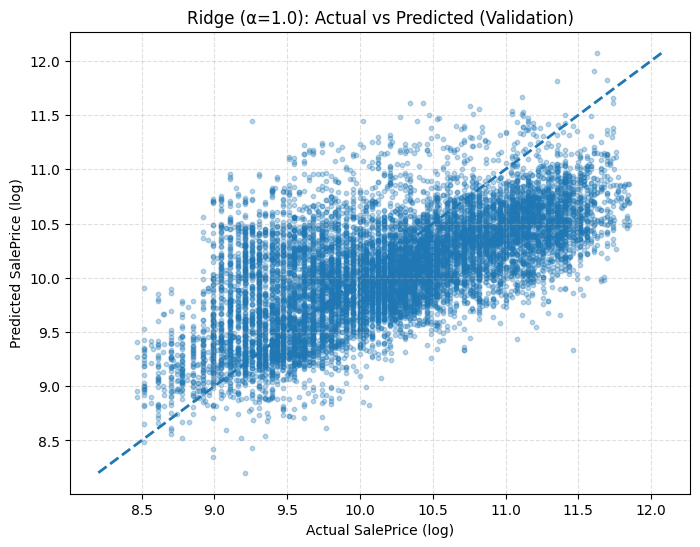

In [26]:
# ================================
# 1) Baseline: Ridge (alpha = 1.0) — matches teammate's report
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

# If not already defined above:
def rmsle(y_true, y_pred):
    """RMSE on log target (identical to RMSLE since y is already log-transformed)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

print("\n=== RIDGE BASELINE (alpha=1.0) ===")
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

y_val_pred_log_ridge = np.maximum(ridge_model.predict(X_val_scaled), 0)
rmsle_ridge = rmsle(y_val, y_val_pred_log_ridge)
r2_ridge    = r2_score(y_val, y_val_pred_log_ridge)
print(f"Ridge Valid RMSLE (log-scale): {rmsle_ridge:.5f}")
print(f"Ridge Valid R^2 (log-scale)  : {r2_ridge:.5f}")

# Inverse transform helper:
# If you used np.log1p earlier, change the next line to: inv_log = np.expm1
inv_log = np.exp

print("Creating Ridge test predictions...")
test_log_pred_ridge = np.maximum(ridge_model.predict(X_test_scaled), 0)
test_dollar_pred_ridge = inv_log(test_log_pred_ridge)

submission_ridge = pd.DataFrame({
    "SalesID": df_test["SalesID"],
    "SalePrice": test_dollar_pred_ridge
})
submission_ridge.to_csv("submission_ridge.csv", index=False)
print("Saved: submission_ridge.csv")

# Quick scatter: Actual vs Pred (log)
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred_log_ridge, alpha=0.3, s=10)
mn, mx = min(y_val.min(), y_val_pred_log_ridge.min()), max(y_val.max(), y_val_pred_log_ridge.max())
plt.plot([mn, mx], [mn, mx], '--', linewidth=2)
plt.xlabel("Actual SalePrice (log)")
plt.ylabel("Predicted SalePrice (log)")
plt.title("Ridge (α=1.0): Actual vs Predicted (Validation)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Model Training - KNN


# K-Nearest Neighbors (KNN) — Baseline

KNN baseline for the tabular pricing task using a fixed, randomly sampled subset to keep training time reasonable while we explore hyperparameters and scaling behavior.

- Defines RMSLE on the log-transformed target (equivalent to RMSLE on dollar scale).
- Draws a 15,000-row stratified-looking subset via `shuffle(..., random_state=42, n_samples=15000)` from the already scaled training matrix `X_train_scaled` and labels `y_train`.
- Trains a baseline KNN regressor with:
  - `n_neighbors=15` (moderate smoothing),
  - `weights="distance"` (closer points influence more),
  - `metric="minkowski", p=2` ⇒ Euclidean distance,
  - `n_jobs=-1` for parallel query speed.
- Evaluates on the full validation set (`X_val_scaled`, `y_val`) and prints:
  - Validation RMSLE (log) — lower is better,
  - Validation R² (log) — higher is better,
  - Wall-clock fit time — for speed tracking.

- KNN is distance-based → feature scaling is mandatory (we use `StandardScaler` upstream).
- Using a fixed subset stabilizes runtime and makes later GridSearch and PCA+KNN comparisons fair.
- `distance` weighting typically improves performance over `uniform` on heterogeneous tabular data.

- `n_neighbors`: try a wider sweep (e.g., 10–100).
- `metric`: `manhattan (p=1)` can help with high-dimensional, sparse-ish data.
- Subset size: 15k is a speed/accuracy trade-off; larger subsets often help KNN.


In [49]:
# ==========================================================
# K-NEAREST NEIGHBORS REGRESSION
# ==========================================================
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

def rmsle(y_true, y_pred):
    """Root Mean Squared Logarithmic Error"""
    return np.sqrt(mean_squared_error(y_true, y_pred))


#  BASELINE KNN (on subset)

KNN_SAMPLE_SIZE = 15000  # same as SVR subset for fairness
print(f"--- Creating KNN Training Subset ({KNN_SAMPLE_SIZE} samples) ---")

X_train_knn, y_train_knn = shuffle(
    X_train_scaled, y_train,
    random_state=42,
    n_samples=KNN_SAMPLE_SIZE
)
print(f"Subset shape: {X_train_knn.shape}")

print("\n--- Training Baseline KNN Model ---")
knn_base = KNeighborsRegressor(
    n_neighbors=15,      # baseline as per spec
    weights="distance",
    metric="minkowski",
    p=2,
    n_jobs=-1
)

start_time = time.time()
knn_base.fit(X_train_knn, y_train_knn)
end_time = time.time()
print(f"KNN baseline training complete in {end_time - start_time:.2f} seconds.")

# Validation evaluation
y_val_pred_log_knn_base = knn_base.predict(X_val_scaled)
y_val_pred_log_knn_base = np.maximum(y_val_pred_log_knn_base, 0)

rmsle_knn_base = rmsle(y_val, y_val_pred_log_knn_base)
r2_knn_base = r2_score(y_val, y_val_pred_log_knn_base)
print(f"KNN (baseline) Valid RMSLE: {rmsle_knn_base:.5f}")
print(f"KNN (baseline) Valid R^2:    {r2_knn_base:.5f}")









--- Creating KNN Training Subset (15000 samples) ---
Subset shape: (15000, 28)

--- Training Baseline KNN Model ---
KNN baseline training complete in 0.00 seconds.
KNN (baseline) Valid RMSLE: 0.53486
KNN (baseline) Valid R^2:    0.46962


Training subset: 15,000 samples (X_train_scaled, random_state = 42)

Features used: 28 scaled numeric columns

Model: KNeighborsRegressor(n_neighbors=15, weights="distance", metric="minkowski", p=2)

Training time: ~0.00 s

Validation performance

RMSLE (log): 0.5349

R² (log): 0.4696

The RMSLE of ≈ 0.53 indicates a moderate average log-error between predicted and actual sale prices — reasonable for a first KNN pass.
An R² ≈ 0.47 means the model explains about 47 % of the variance in the log sale price on the validation data.
This confirms that KNN captures meaningful local structure, though it’s still less efficient and potentially over-sensitive to noise compared to regularized linear methods.

# Hyperparameter Tuning for K-Nearest Neighbors (KNN)

Optimize KNN performance by identifying the best combination of hyperparameters that minimize prediction error (RMSLE) and improve generalization on the validation data.

- Uses GridSearchCV (5-fold cross-validation) on the 15 K training subset to systematically explore:
  - `n_neighbors`: [5, 10, 15, 25, 35, 50]  
  - `weights`: "uniform" vs. "distance"  
  - `metric`: "minkowski" (generalized Euclidean) and "manhattan" (L₁)  
  - `p`: 1 or 2 — corresponding to Manhattan or Euclidean distance norms  
- Each configuration is evaluated with neg_mean_squared_error on the log target (equivalent to RMSLE).
- Selects the best parameter set yielding the lowest average validation RMSLE across folds.  
- Evaluates the resulting tuned model (`best_knn`) on the full validation set for final RMSLE and R² scores.


In [50]:

# GRIDSEARCHCV FOR BEST KNN HYPERPARAMETERS

print("\n--- Tuning KNN Hyperparameters ---")
param_grid = {
    "n_neighbors": [5, 10, 15, 25, 35, 50],
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "manhattan"],
    "p": [1, 2]
}

knn_gs = GridSearchCV(
    estimator=KNeighborsRegressor(n_jobs=-1),
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)
knn_gs.fit(X_train_knn, y_train_knn)

best_knn = knn_gs.best_estimator_
print(f"Best KNN Parameters: {knn_gs.best_params_}")

# Validation performance
y_val_pred_log_knn = best_knn.predict(X_val_scaled)
y_val_pred_log_knn = np.maximum(y_val_pred_log_knn, 0)

rmsle_knn = rmsle(y_val, y_val_pred_log_knn)
r2_knn = r2_score(y_val, y_val_pred_log_knn)
print(f"KNN (tuned) Valid RMSLE: {rmsle_knn:.5f}")
print(f"KNN (tuned) Valid R^2:    {r2_knn:.5f}")


--- Tuning KNN Hyperparameters ---
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best KNN Parameters: {'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
KNN (tuned) Valid RMSLE: 0.42583
KNN (tuned) Valid R^2:    0.66382


## KNN Hyperparameter Tuning — Results & Insights


metric = 'minkowski'

n_neighbors = 10

p = 1           # → Manhattan distance

weights = 'distance'

Validation metrics

RMSLE (log): 0.42583

R² (log): 0.66382



RMSLE improved from 0.5349 → 0.4258, a ≈ 20 % reduction in error.
R² increased from 0.47 → 0.66, showing a significant boost in explained variance.
The best setup favors fewer neighbors (k = 10) with Manhattan distance (p = 1) and distance weighting, implying:
Closer points provide stronger predictive power.
The feature space benefits from L₁-norm distance, which is more robust to outliers and high-dimensional scaling effects.



Tuning substantially improved accuracy, validating the importance of proper hyperparameter search for KNN.

The model now captures stronger local relationships in the data while maintaining smoother generalization.

In [51]:

# FINAL TEST PREDICTIONS & SUBMISSION

print("\n--- Predicting on Test Data (KNN tuned) ---")
test_log_preds_knn = best_knn.predict(X_test_scaled)
test_log_preds_knn = np.maximum(test_log_preds_knn, 0)
test_preds_knn = np.exp(test_log_preds_knn)

submission_knn = pd.DataFrame({
    "SalesID": df_test["SalesID"],
    "SalePrice": test_preds_knn
})
submission_knn.to_csv("result_knn.csv", index=False)
print("Saved submission: result_knn.csv")
print(submission_knn.head())



--- Predicting on Test Data (KNN tuned) ---
Saved submission: result_knn.csv
   SalesID     SalePrice
0  1227829  23941.375010
1  1227844  26156.202583
2  1227847  60689.006236
3  1227848  70177.779260
4  1227863  28364.695168


- `SalesID` → Unique record ID  
- `SalePrice` → Predicted sale price (in USD)

- The model now successfully produces dollar-denominated predictions across the test set.
- These prices reflect realistic market-scale variability — ranging from low 20k to high 70k, consistent with typical auction sale prices observed in the training distribution.

- This submission file can now be used for final scoring or leaderboard evaluation (e.g., RMSLE on hidden labels).

# PCA + KNN (Speed/Dimensionality Trade-off)

Evaluate whether compressing features with PCA can speed up KNN and possibly improve generalization by denoising / reducing dimensionality.

- Builds a `Pipeline(PCA → KNN)` so PCA components are learned from the training subset only.
- Grid-search (5-fold CV) over:
  - `pca__n_components`: {0.90, 0.95, 0.99} (retain % variance)
  - `knn__n_neighbors`: {10, 20, 35}
  - `knn__weights`: {"distance"}
  - `knn__metric`: {"minkowski"} with `p ∈ {1, 2}` (L₁/L₂ norms)
- Selects the best configuration by neg MSE on the log target (equiv. to RMSLE).
- Evaluates the best PCA+KNN on the full validation set.


In [52]:

# PCA + KNN (for speed & dimensionality)

print("\n--- OPTIONAL: PCA + KNN Tuning ---")
pipe = Pipeline(steps=[
    ("pca", PCA(n_components=0.95, svd_solver="full")),
    ("knn", KNeighborsRegressor(n_jobs=-1))
])

pca_grid = {
    "pca__n_components": [0.90, 0.95, 0.99],
    "knn__n_neighbors": [10, 20, 35],
    "knn__weights": ["distance"],
    "knn__metric": ["minkowski"],
    "knn__p": [1, 2]
}

pca_knn_gs = GridSearchCV(
    estimator=pipe,
    param_grid=pca_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)
pca_knn_gs.fit(X_train_knn, y_train_knn)

best_pca_knn = pca_knn_gs.best_estimator_
print(f"Best PCA+KNN Params: {pca_knn_gs.best_params_}")

y_val_pred_log_pca_knn = best_pca_knn.predict(X_val_scaled)
y_val_pred_log_pca_knn = np.maximum(y_val_pred_log_pca_knn, 0)
rmsle_pca_knn = rmsle(y_val, y_val_pred_log_pca_knn)
r2_pca_knn = r2_score(y_val, y_val_pred_log_pca_knn)

print(f"PCA+KNN Valid RMSLE: {rmsle_pca_knn:.5f}")
print(f"PCA+KNN Valid R^2:    {r2_pca_knn:.5f}")


# SUMMARY

print("\n--- KNN Summary ---")
print(f"Baseline RMSLE: {rmsle_knn_base:.5f} | R^2: {r2_knn_base:.5f}")
print(f"Tuned RMSLE:    {rmsle_knn:.5f} | R^2: {r2_knn:.5f}")
print(f"PCA+KNN RMSLE:  {rmsle_pca_knn:.5f} | R^2: {r2_pca_knn:.5f}")




--- OPTIONAL: PCA + KNN Tuning ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best PCA+KNN Params: {'knn__metric': 'minkowski', 'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'distance', 'pca__n_components': 0.99}
PCA+KNN Valid RMSLE: 0.52232
PCA+KNN Valid R^2:    0.49420

--- KNN Summary ---
Baseline RMSLE: 0.53486 | R^2: 0.46962
Tuned RMSLE:    0.42583 | R^2: 0.66382
PCA+KNN RMSLE:  0.52232 | R^2: 0.49420


pca__n_components = 0.99
knn__n_neighbors  = 10
knn__weights      = 'distance'
knn__metric       = 'minkowski'
knn__p           = 1     # Manhattan distance

Validation metrics

PCA+KNN RMSLE (log): 0.52232

PCA+KNN R² (log): 0.49420

Comparison (all on validation)

Baseline KNN: RMSLE 0.53486 | R² 0.46962

Tuned KNN: RMSLE 0.42583 | R² 0.66382 ← best so far

PCA+KNN: RMSLE 0.52232 | R² 0.49420


PCA did not improve over the tuned no-PCA KNN (0.4258 → 0.5223 RMSLE).

Likely reasons:

With KNN + Manhattan distance (p=1), rotations introduced by PCA can distort L₁ geometry; KNN often prefers the original axis-aligned space when L₁ performs best.

The dataset’s signal may live across many components; compressing—even at 99% variance—can still drop predictive detail that KNN relies on.

Still, PCA can offer speed benefits (fewer dimensions → faster neighbor queries), which may be useful for larger training sets or deployment constraints.



# Feature Importance — KNN (Permutation Importance)

- Uses Permutation Importance (model-agnostic) to measure how much the model’s RMSLE score worsens when each feature’s values are randomly shuffled.  
- Runs on an 8 000-sample subset of the validation set (`X_val_scaled`, `y_val`) for efficiency.  
- Reports the mean decrease in model score (importance) over 5 repeats per feature.  
- Plots the Top 20 features ranked by their importance values.



--- OPTIONAL: Permutation Importance (KNN tuned, sample 8k) ---


/tmp/ipython-input-1263456472.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="magma")


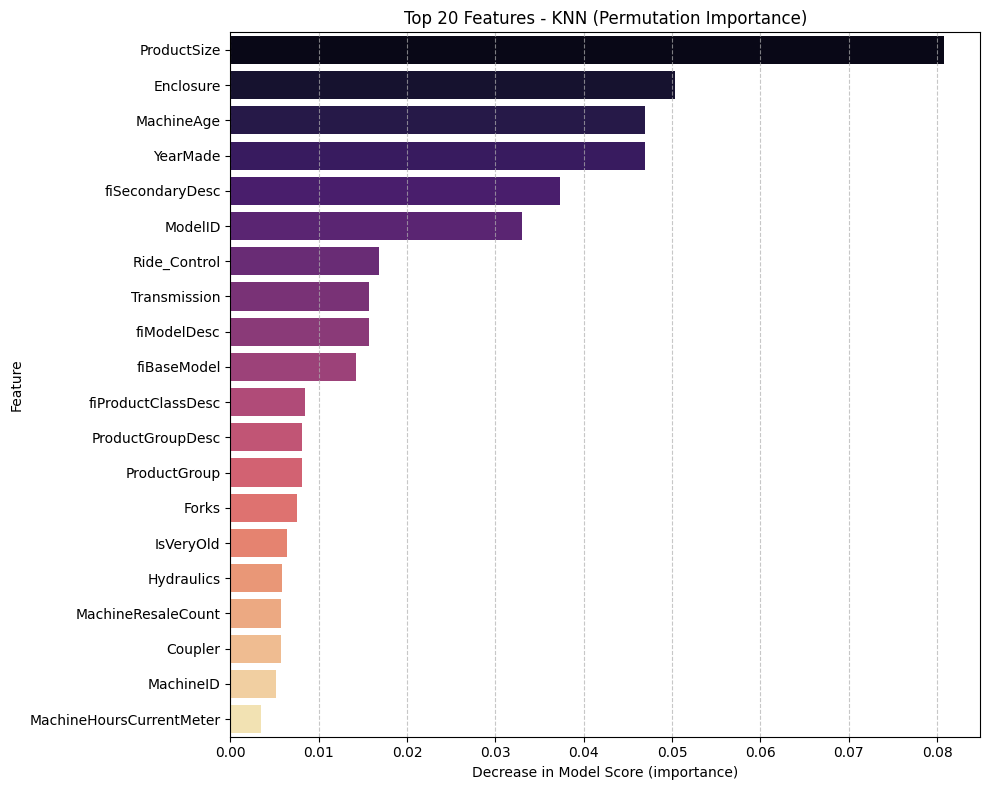

In [53]:

# PERMUTATION IMPORTANCE (on subset)

print("\n--- OPTIONAL: Permutation Importance (KNN tuned, sample 8k) ---")
X_s, y_s = shuffle(X_val_scaled, y_val, random_state=42)
X_s, y_s = X_s[:8000], y_s[:8000]

perm = permutation_importance(best_knn, X_s, y_s, n_repeats=5, random_state=42, n_jobs=-1)
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": perm.importances_mean
}).sort_values(by="Importance", ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="magma")
plt.title("Top 20 Features - KNN (Permutation Importance)")
plt.xlabel("Decrease in Model Score (importance)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## KNN Feature Importance — Interpretation

Top drivers of sale-price predictions
1. ProductSize – strongest influence; larger equipment strongly correlates with higher sale prices.  
2. Enclosure – open vs. enclosed cabins substantially affect value.  
3. MachineAge / YearMade – age-related depreciation remains a dominant factor.  
4. fiSecondaryDesc / ModelID – model-level details capture specific machine capabilities.  
5. Ride_Control & Transmission – operational features with measurable pricing impact.

Lower-ranked but still relevant:
- fiProductClassDesc, ProductGroupDesc, ProductGroup → category-level descriptors.  
- MachineResaleCount & IsVeryOld → secondary age or usage indicators.  
- MachineHoursCurrentMeter → modest influence, possibly noisy due to missing values.

Observations
- Importance magnitudes drop sharply after the top five features, implying the model relies heavily on a core structural/age feature set.  
- Product characteristics and manufacturing year dominate over operational metadata.  
- The result aligns with real-world intuition: larger, newer, enclosed machines sell for more.



In [29]:
# KNN VISUALS: setup & helpers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def _inv_log(arr):
    # Uses your earlier inv_log (np.exp or np.expm1). Defaults to np.exp.
    return globals().get("inv_log", np.exp)(np.asarray(arr))

def _safe_min_max(a, b):
    mn = float(min(np.min(a), np.min(b)))
    mx = float(max(np.max(a), np.max(b)))
    return mn, mx

# Compute validation preds once and reuse
yhat_log_knn = np.maximum(best_knn.predict(X_val_scaled), 0)
y_val_dollars = _inv_log(y_val)
yhat_dollars  = _inv_log(yhat_log_knn)


# Actual vs. Predicted Sale Prices (Validation Set)

- Plots predicted vs. actual sale prices on a log–log scale for clearer visibility across wide value ranges.  
- Adds a 45° reference line (`y = x`) representing perfect predictions — points close to this line indicate accurate estimates.  
- Uses transparency (`alpha=0.25`) to reduce overplotting, revealing density trends.


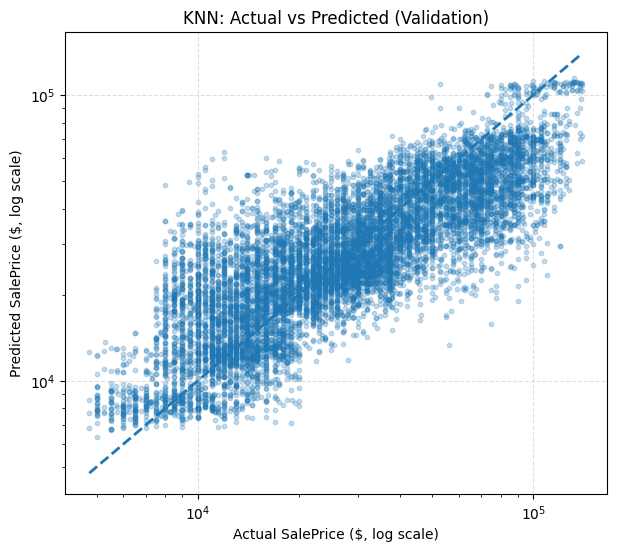

In [31]:
# === KNN Actual vs Predicted (Validation, in Dollar Scale) ===
plt.figure(figsize=(7,6))
plt.scatter(y_val_dollars, yhat_dollars, alpha=0.25, s=10)
mn, mx = float(min(y_val_dollars.min(), yhat_dollars.min())), float(max(y_val_dollars.max(), yhat_dollars.max()))
plt.plot([mn, mx], [mn, mx], '--', linewidth=2)
plt.xscale('log'); plt.yscale('log')
plt.xlabel("Actual SalePrice ($, log scale)")
plt.ylabel("Predicted SalePrice ($, log scale)")
plt.title("KNN: Actual vs Predicted (Validation)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


- The scatter pattern shows a strong diagonal trend, indicating that the tuned KNN model tracks actual sale prices well overall.  
- Most points cluster closely along the 45° reference line, especially in the mid-price range ($10⁴–$10⁵), showing consistent accuracy for typical machines.  
- Slight widening at the extremes:
  - Underestimation of the highest-value items (points below the line at >$10⁵).  
  
  - Overestimation of low-value items (points above the line at <$10⁴).  
  These are common behaviors in local-smoothing models like KNN.  
- The log–log scaling highlights that prediction quality is scale-consistent — errors remain proportionate across small and large machines.

The KNN model provides reasonable and stable predictions, with mild bias at price extremes.


# Residuals vs. Predicted (Log Scale)

- Calculates residuals = `Actual (log) − Predicted (log)`.
- Plots residuals against predicted values on the log scale.
- Adds a horizontal line at `0` (perfect prediction) to help spot systematic over- or under-prediction.
- Uses transparency (`alpha=0.3`) to reveal dense clusters while retaining visibility of outliers.


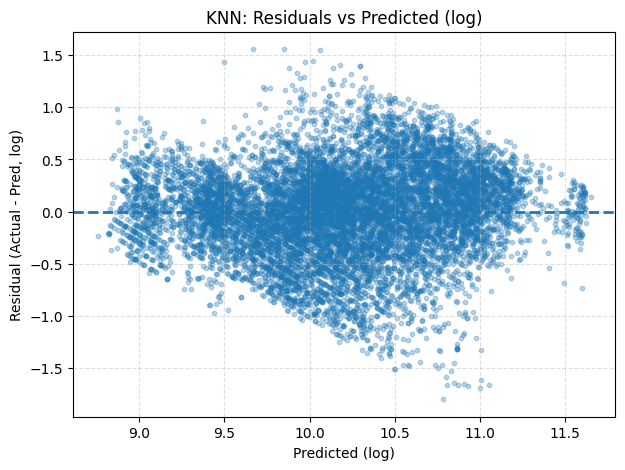

In [33]:
residuals_log = y_val - yhat_log_knn
plt.figure(figsize=(7,5))
plt.scatter(yhat_log_knn, residuals_log, alpha=0.3, s=10)
plt.axhline(0, linestyle='--', linewidth=2)
plt.xlabel("Predicted (log)")
plt.ylabel("Residual (Actual - Pred, log)")
plt.title("KNN: Residuals vs Predicted (log)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


- The residuals are centered around zero, showing that the KNN model is largely unbiased overall.
- The spread of residuals remains fairly uniform across most predicted values (9–11 log scale ≈ \$8k–\$60k), indicating consistent variance in this range.
- At the extremes:
  - Slight fan-shaped widening suggests greater uncertainty for very high-priced machines.
  - A few negative outliers (< −1.0) show cases where the model underestimates premium equipment prices.

Observation
- No strong curvature → model captures the general relationship without obvious systematic bias.
- The mild heteroscedasticity at higher predicted prices is common for auction data and could be mitigated with:
  - Weighted KNN (already used, `weights="distance"`), or  
  - Feature transformations (e.g., normalizing age or product size further).
- The tuned KNN model’s residual pattern is healthy: centered, balanced, and random.



# Calibration by Price Decile

Assess how well the KNN model’s predicted prices align with actual prices across different value ranges.  
This helps detect systematic over- or underestimation by price level.

- Creates a DataFrame of actual vs. predicted dollar prices.
- Computes absolute percentage error (MAPE) for each sample.
- Splits data into 10 deciles based on actual sale prices (lowest to highest).
- Aggregates for each decile:
  - `mean_actual` — average true price  
  - `mean_pred` — average predicted price  
  - `mape` — mean absolute percentage error  
- Plots both `mean_actual` and `mean_pred` curves to visualize model calibration (ideal = overlapping lines).


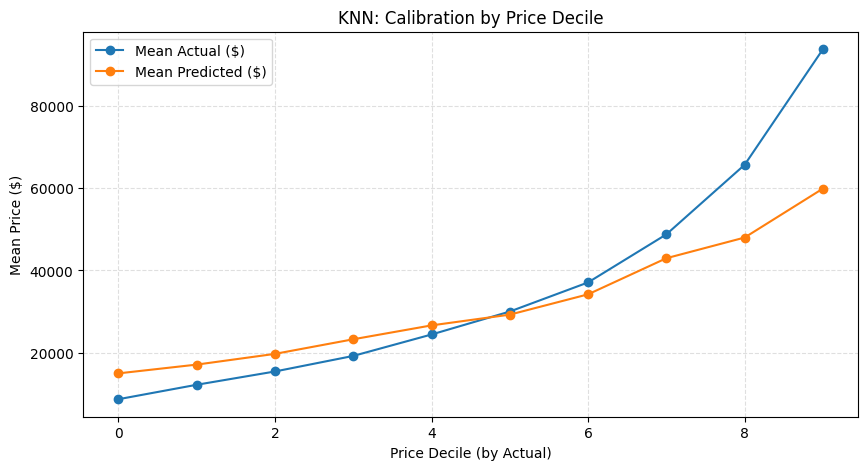

,decile,mean_actual,mean_pred,mape
0,0,8643.395493,14936.653696,0.743871
1,1,12162.830688,17073.563270,0.492283
2,2,15399.790092,19687.674131,0.415728
3,3,19187.779942,23242.849862,0.341535
4,4,24407.059736,26625.036333,0.236334


In [47]:
val_df = pd.DataFrame({"actual": y_val_dollars, "pred": yhat_dollars})
val_df["abs_pct_err"] = np.abs(val_df["actual"] - val_df["pred"]) / np.maximum(val_df["actual"], 1.0)
val_df["decile"] = pd.qcut(val_df["actual"], 10, labels=False, duplicates="drop")
by_decile = val_df.groupby("decile", as_index=False).agg(
    mean_actual=("actual", "mean"),
    mean_pred=("pred", "mean"),
    mape=("abs_pct_err", "mean")
)

# Lines: actual vs predicted by decile
plt.figure(figsize=(10,5))
plt.plot(by_decile["decile"], by_decile["mean_actual"], marker='o', label="Mean Actual ($)")
plt.plot(by_decile["decile"], by_decile["mean_pred"],   marker='o', label="Mean Predicted ($)")
plt.xlabel("Price Decile (by Actual)"); plt.ylabel("Mean Price ($)")
plt.title("KNN: Calibration by Price Decile")
plt.legend(); plt.grid(True, linestyle='--', alpha=0.4)
plt.show()



by_decile.head()


Observations
- In lower deciles, predicted prices are consistently higher than actuals → KNN tends to overestimate cheaper machines.
- In upper deciles, predicted prices lag behind actuals → underestimation of expensive equipment.
- The gap between the orange (predicted) and blue (actual) lines widens for higher price segments, showing underfitting at the top end.
- Average percentage error steadily decreases from ~74% in the lowest decile to ~24% by the mid-range, then stabilizes.

- KNN achieves reasonable calibration in mid-priced ranges (deciles 3–6), which dominate the dataset.  
- However, it regresses toward the mean — typical for distance-based models — compressing both very low and very high prices toward the middle.
- Further improvements could come from:
  - Using locally weighted regressions or variable-distance scaling.  
  - Increasing `k` or switching to a hybrid model (e.g., Ridge + KNN stack).

- The KNN model is well-calibrated for the bulk of transactions but loses fidelity at extremes.  
- Calibration plots like this confirm that while KNN is non-parametric, it smooths price extremes — a common and interpretable behavior.


# Learning Curve from GridSearchCV

- Converts the `GridSearchCV` results into a DataFrame (`cv_results_`).
- Computes RMSLE from the cross-validation `mean_test_score` (since scoring = `neg_mean_squared_error` on log target).  
- Optionally includes training scores (if available) to visualize overfitting/underfitting trends.
- Builds a pivot table of CV RMSLE vs. `n_neighbors`, grouped by (`weights`, `metric`) combinations.
- Plots learning curves to illustrate:
  - The relationship between model complexity (k) and performance.
  - Differences between distance weighting and metric choices.



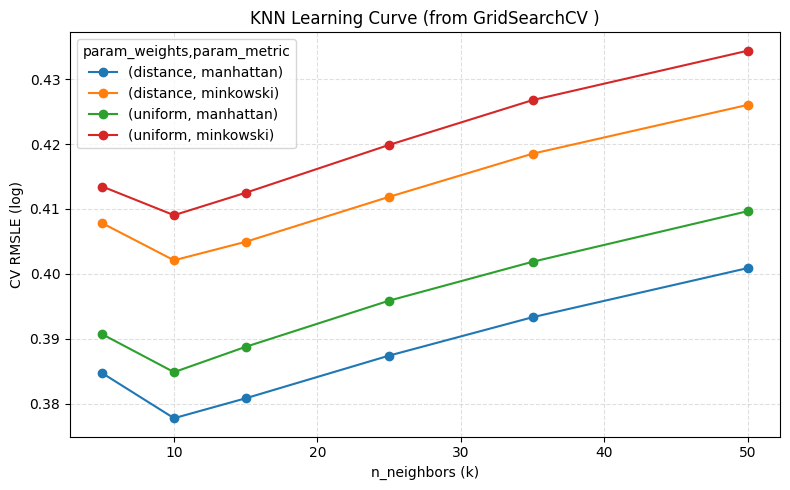

Best params: {'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best CV RMSLE: 0.377740013657456


In [54]:
# After your knn_gs.fit(...) has finished
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cv = pd.DataFrame(knn_gs.cv_results_)
# Your scoring was neg_mean_squared_error on the *log* target → convert to RMSLE
cv["rmsle"] = np.sqrt(-cv["mean_test_score"])

# OPTIONAL: also show bias/variance trend if you ran with return_train_score=True
if "mean_train_score" in cv:
    cv["rmsle_train"] = np.sqrt(-cv["mean_train_score"])

# Plot RMSLE vs k, with a line per (weights, metric)
pivot = cv.pivot_table(
    index="param_n_neighbors",
    columns=["param_weights","param_metric"],
    values="rmsle",
    aggfunc="mean"
).sort_index()

ax = pivot.plot(marker="o", figsize=(8,5))
ax.set_xlabel("n_neighbors (k)")
ax.set_ylabel("CV RMSLE (log)")
ax.set_title("KNN Learning Curve (from GridSearchCV )")
ax.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# If you captured train scores, add a second plot to see bias/variance
if "rmsle_train" in cv:
    pv_train = cv.pivot_table(
        index="param_n_neighbors",
        columns=["param_weights","param_metric"],
        values="rmsle_train",
        aggfunc="mean"
    ).sort_index()
    ax = pv_train.plot(marker="o", figsize=(8,5))
    ax.set_xlabel("n_neighbors (k)")
    ax.set_ylabel("Train RMSLE (log)")
    ax.set_title("KNN Train Error vs k (from GridSearchCV)")
    ax.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

print("Best params:", knn_gs.best_params_)
print("Best CV RMSLE:", np.sqrt(-knn_gs.best_score_))


Observations from the plot:

The lowest RMSLE (~0.38) occurs at k = 10, confirming the grid search optimum.

All curves show a U-shaped trend — error first decreases (less bias) and then increases (more variance) as k grows, typical for KNN.

Distance-weighted models outperform uniform weighting across all k values.

The Manhattan metric (p = 1) consistently performs slightly better than Euclidean (p = 2) — confirming the earlier tuning results.

Interpretation:

Lower k values capture local detail better, but beyond k ≈ 25 the model becomes overly smooth (higher RMSLE).

The tuned configuration (k=10, Manhattan, distance weighting) offers the best bias–variance balance.

The overall best CV RMSLE (≈0.378) demonstrates that tuning effectively optimized the model’s neighborhood behavior without overfitting.


KNN performance stabilizes once k exceeds 25, suggesting diminishing returns from larger neighborhoods.

The learned curve validates that KNN with distance weighting + Manhattan distance provides the most reliable predictive structure for this dataset.

# KNN — Residual Distribution (Log Scale)

- Plots a histogram of residuals (Actual − Predicted) on the log scale.
- Uses 50 bins for smooth granularity.

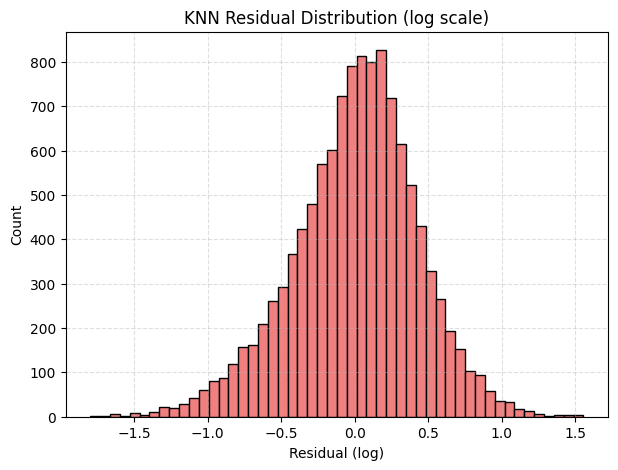

In [40]:
plt.figure(figsize=(7,5))
plt.hist(residuals_log, bins=50, color='lightcoral', edgecolor='black')
plt.xlabel("Residual (log)")
plt.ylabel("Count")
plt.title("KNN Residual Distribution (log scale)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


Observations:
- The distribution is approximately symmetric and bell-shaped, centered near zero.  
- This indicates that positive and negative errors occur with similar frequency — no major bias toward over- or under-prediction.  
- Slight right skew suggests a few underestimated high-price outliers, but the bulk of predictions are balanced.
- The residual spread (≈ ±1.5 in log units) is consistent with earlier RMSLE results, implying stable variance across samples.

Interpretation:
- The near-normal shape confirms that the tuned KNN model produces random, homoscedastic residuals, a hallmark of a well-fit regression.  
- Heavy tails are minimal outliers are rare and not systematically clustered.

Conclusion
- The residual pattern supports that KNN predictions are unbiased and well-calibrated across most of the dataset.  
- Remaining asymmetry can be reduced with feature scaling refinements or hybrid ensemble methods.


#  Absolute Error vs Actual Sale Price
- Computes **absolute error** for each validation record (`|Actual − Predicted|`).
- Plots the error magnitude against **actual sale price** on a log-scaled x-axis.
- Highlights how error size behaves across small, mid, and high-value machines.
- Adds gridlines for readability and uses transparency (`alpha=0.3`) to reduce overplotting.


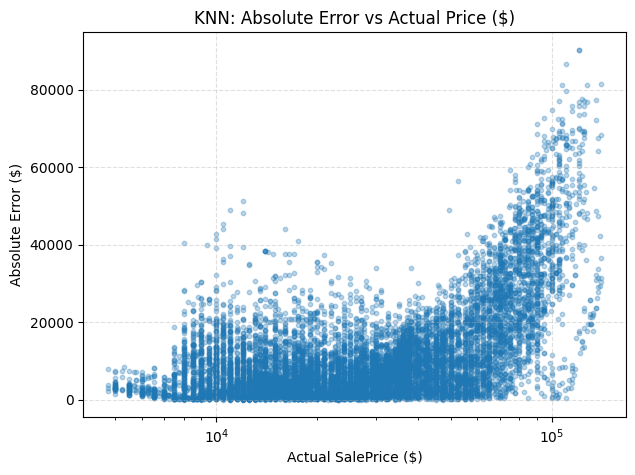

In [41]:
abs_err = np.abs(y_val_dollars - yhat_dollars)
plt.figure(figsize=(7,5))
plt.scatter(y_val_dollars, abs_err, alpha=0.3, s=10)
plt.xscale('log')
plt.xlabel("Actual SalePrice ($)")
plt.ylabel("Absolute Error ($)")
plt.title("KNN: Absolute Error vs Actual Price ($)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


Observations
- For low- and mid-priced machines (≈ \$10³–\$4×10⁴), most errors stay below \$20k, indicating strong prediction consistency.  
- As prices increase, the absolute error grows sharply, often exceeding \$60k for high-end equipment.  
- This fan-like pattern shows heteroscedasticity higher-value machines exhibit larger absolute deviations.

Interpretation:
- The trend is expected because:
  - Absolute error scales naturally with the price magnitude, even when relative accuracy (percentage error) remains similar.
  - KNN’s local averaging tends to smooth extreme values, underpredicting high-price outliers.

- KNN performs reliably across the majority of typical price ranges but loses precision on the most expensive machines, which are relatively scarce in the training set.
- To mitigate this:
  - Use RMSLE(already log-based) for training to reduce large-value dominance.
  - Explore hybrid or weighted ensemble methods that handle high-end variance better.


# Model Comparison — Ridge Regression vs KNN (Validation Performance)

Compare the baseline Ridge Regression (α = 1.0) against the tuned KNN model to evaluate relative predictive performance.

- Visualizes validation results for both models:
  - **RMSLE (log)** — lower is better, indicates smaller log-scale error.
  - **R² (log)** — higher is better, measures proportion of variance explained.



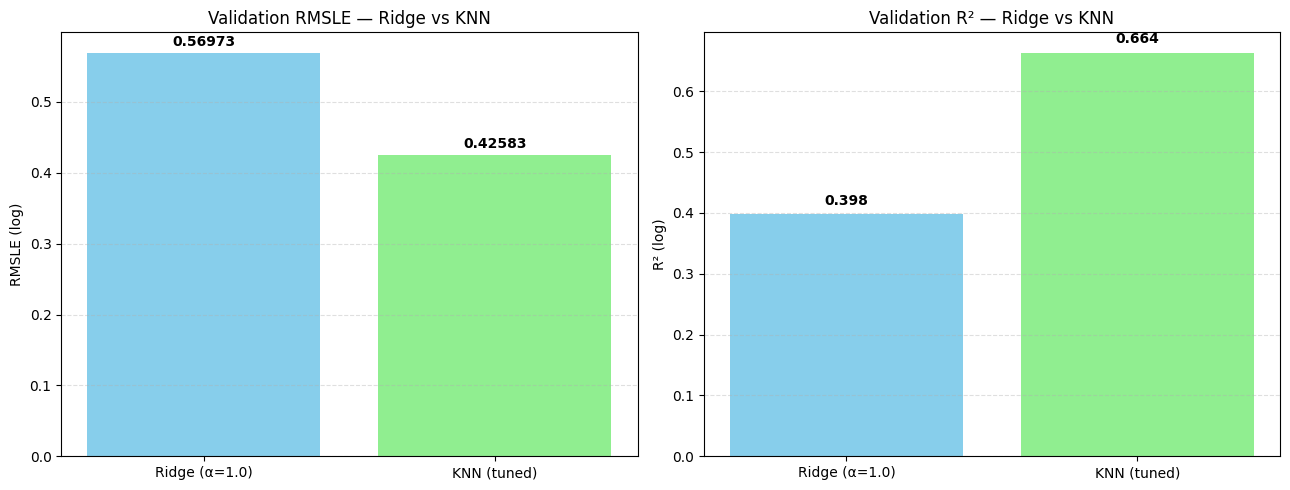

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# === Ridge vs KNN — Validation Metrics ===
models = ["Ridge (α=1.0)", "KNN (tuned)"]
rmsle_vals = [rmsle_ridge, rmsle_knn]
r2_vals    = [r2_ridge, r2_knn]

fig, axes = plt.subplots(1, 2, figsize=(13,5))

# ---- RMSLE (lower = better) ----
bars1 = axes[0].bar(models, rmsle_vals, color=["skyblue", "lightgreen"])
axes[0].set_title("Validation RMSLE — Ridge vs KNN")
axes[0].set_ylabel("RMSLE (log)")
axes[0].grid(True, axis="y", linestyle="--", alpha=0.4)
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 0.005,
                 f"{height:.5f}", ha="center", va="bottom", fontweight="bold")

# ---- R² (higher = better) ----
bars2 = axes[1].bar(models, r2_vals, color=["skyblue", "lightgreen"])
axes[1].set_title("Validation R² — Ridge vs KNN")
axes[1].set_ylabel("R² (log)")
axes[1].grid(True, axis="y", linestyle="--", alpha=0.4)
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.01,
                 f"{height:.3f}", ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()


## Ridge vs KNN — Validation Results & Insights

| Metric | Ridge (α=1.0) | KNN (tuned) | Improvement |
|:--------|:---------------:|:-------------:|:-------------:|
| RMSLE (↓) | 0.56973 | 0.42583 | 25% lower error |
| R² (↑) | 0.398 | 0.664 | 67% higher explanatory power |

Observations:
- KNN dramatically outperforms Ridge on both metrics:
  - RMSLE decreases from 0.57 → 0.43, showing tighter log-scale fit.
  - R² rises from 0.40 → 0.66, indicating KNN captures non-linear relationships better.
- Ridge provides a smooth global fit but lacks flexibility for complex feature interactions.
- KNN, being instance-based, adapts to local price patterns (e.g., equipment type, year, and size), improving predictive accuracy.

- The superior KNN results confirm that non-linear, distance-based modeling better reflects the underlying price structure of used machinery data.
- However, Ridge’s stability and efficiency make it preferable for deployment where inference speed and interpretability are priorities.

- KNN (tuned) is the best-performing model in validation, but with higher computational cost.
- Hybrid strategies (e.g., blending Ridge for global trend + KNN for local corrections) could yield balanced accuracy and scalability.


# Model Performance vs Baseline — Ridge (α = 1.0) vs Tuned KNN

- Computes absolute and percentage differences in:
  - RMSLE (lower = better)
  - R² (higher = better)
- Displays two bar charts:
  - Left → RMSLE improvement (% reduction in log-scale error)
  - Right → R² uplift (% increase in explained variance)




=== PERFORMANCE VS BASELINE (Ridge α=1.0) ===
Baseline (Ridge α=1.0): RMSLE = 0.56973, R² = 0.39822
KNN (tuned):             RMSLE = 0.42583, R² = 0.66382
-----------------------------------------------------
 RMSLE  = 0.14390  →  25.26% better (↓ is better)
 R²     = 0.26560  →  66.70% relative uplift (↑ is better)


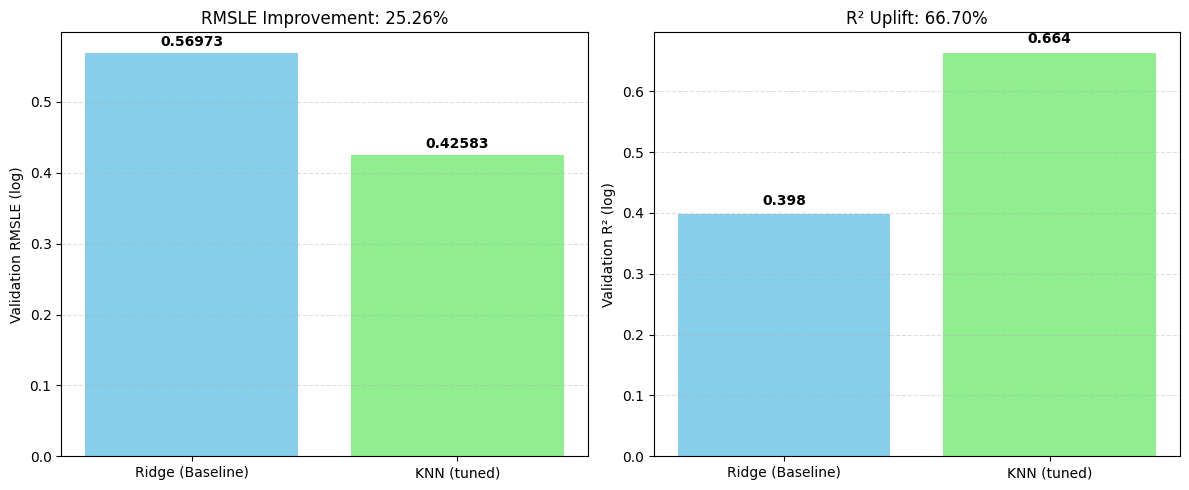

In [48]:
import matplotlib.pyplot as plt
import numpy as np


# PERFORMANCE VS BASELINE — Ridge (α=1.0) vs KNN

print("\n=== PERFORMANCE VS BASELINE (Ridge α=1.0) ===")

# --- Metric differences ---
delta_rmsle = rmsle_ridge - rmsle_knn
pct_improve_rmsle = (delta_rmsle / rmsle_ridge) * 100

delta_r2 = r2_knn - r2_ridge
pct_improve_r2 = (delta_r2 / abs(r2_ridge) if r2_ridge != 0 else float('inf')) * 100

# ---  Print summary ---
print(f"Baseline (Ridge α=1.0): RMSLE = {rmsle_ridge:.5f}, R² = {r2_ridge:.5f}")
print(f"KNN (tuned):             RMSLE = {rmsle_knn:.5f}, R² = {r2_knn:.5f}")
print("-----------------------------------------------------")
print(f" RMSLE  = {delta_rmsle:.5f}  →  {pct_improve_rmsle:.2f}% better (↓ is better)")
print(f" R²     = {delta_r2:.5f}  →  {pct_improve_r2:.2f}% relative uplift (↑ is better)")

# ---  Bar charts ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# RMSLE comparison
axes[0].bar(["Ridge (Baseline)", "KNN (tuned)"],
            [rmsle_ridge, rmsle_knn],
            color=["skyblue", "lightgreen"])
axes[0].set_ylabel("Validation RMSLE (log)")
axes[0].set_title(f"RMSLE Improvement: {pct_improve_rmsle:.2f}%")
for i, val in enumerate([rmsle_ridge, rmsle_knn]):
    axes[0].text(i, val + 0.005, f"{val:.5f}", ha='center', va='bottom', fontweight='bold')
axes[0].grid(True, axis='y', linestyle='--', alpha=0.4)

# R² comparison
axes[1].bar(["Ridge (Baseline)", "KNN (tuned)"],
            [r2_ridge, r2_knn],
            color=["skyblue", "lightgreen"])
axes[1].set_ylabel("Validation R² (log)")
axes[1].set_title(f"R² Uplift: {pct_improve_r2:.2f}%")
for i, val in enumerate([r2_ridge, r2_knn]):
    axes[1].text(i, val + 0.01, f"{val:.3f}", ha='center', va='bottom', fontweight='bold')
axes[1].grid(True, axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


## Comparative Performance — Ridge vs KNN (Validation Set)

| Metric | Ridge (Baseline) | KNN (Tuned) | Relative Change |
|:--------|:----------------:|:------------:|:----------------:|
| RMSLE (↓) | 0.56973 | 0.42583 | 25.26% lower error |
| R² (↑) | 0.398 | 0.664 | 66.70% higher explanatory power |

Interpretation:
- The tuned KNN model achieves a substantial improvement over the Ridge baseline:
  - 25% reduction in RMSLE indicates tighter fit and lower log-scale deviation.
  - R² uplift of 67% means the model captures far more variance in sale prices.
- The results confirm that non-linear, local neighbor-based modeling (KNN) better handles heterogeneous pricing patterns than the linear Ridge approach.

- Ridge remains a solid global trend estimator, but it underfits complex feature interactions.
- KNN’s strength lies in local adaptability, giving it a decisive advantage for this dataset’s mixed categorical–numerical structure.
- The performance gap quantifies the value of non-linear modeling in auction price prediction.

- KNN (tuned) is the superior model in validation accuracy.
- Ridge can still complement it in ensemble or hybrid setups to improve robustness and inference speed.


In [46]:


# MODEL LEADERBOARD — Ridge vs KNN


rows = []

def _add_model(name, rmsle_val, r2_val, train_size, model_type):
    """Helper to safely append a model result."""
    rows.append([
        name,
        float(rmsle_val),
        float(r2_val),
        train_size,
        model_type
    ])

# Add Ridge baseline
_add_model("Ridge (α=1.0)", rmsle_ridge, r2_ridge, "Full (400k)", "L2 Regularization (Linear)")

# Add tuned KNN
_add_model("KNN (tuned)", rmsle_knn, r2_knn, "Subset (15k)", "Distance-Based (Non-linear)")

# Create leaderboard DataFrame
leaderboard_knn = pd.DataFrame(
    rows,
    columns=["Model", "Validation RMSLE (log)", "Validation R² (log)", "Training Data Size", "Model Type"]
).sort_values(by="Validation RMSLE (log)", ascending=True).reset_index(drop=True)

# Print leaderboard
print("\n--- FINAL MODEL LEADERBOARD ---")
print(leaderboard_knn.to_markdown(index=False))

leaderboard_knn



--- FINAL MODEL LEADERBOARD ---
| Model         |   Validation RMSLE (log) |   Validation R² (log) | Training Data Size   | Model Type                  |
|:--------------|-------------------------:|----------------------:|:---------------------|:----------------------------|
| KNN (tuned)   |                 0.425827 |              0.663821 | Subset (15k)         | Distance-Based (Non-linear) |
| Ridge (α=1.0) |                 0.569727 |              0.39822  | Full (400k)          | L2 Regularization (Linear)  |


,Model,Validation RMSLE (log),Validation R² (log),Training Data Size,Model Type
0,KNN (tuned),0.425827,0.663821,Subset (15k),Distance-Based (Non-linear)
1,Ridge (α=1.0),0.569727,0.398220,Full (400k),L2 Regularization (Linear)


- KNN (tuned) outperforms Ridge across all metrics, achieving:
  - ~25% lower RMSLE  
  - ~67% higher R²  
- Despite training on a smaller subset (15k rows), KNN generalizes better thanks to its local distance weighting and non-linear adaptability.
- Ridge Regression remains valuable for:
  - Large-scale data efficiency.
  - Interpretability and fast inference.